## Scrape the data from Flipkart website and perform EDA: 
1.	Using beautifulsoup scrape the Flipkart laptops page
2.	Store the data in a pandas dataframe
3.	Extract features of laptops in separate columns
4.	Take care of data types, convert numerical data types to int or float
5.	Handle duplicate and missing values
6.	Perform end to end EDA and mention the observations in markdown cells



In [330]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import time

import warnings
warnings.filterwarnings('ignore')


In [331]:
URL='https://www.flipkart.com/search?q=laptops&as=on&as-show=on&otracker=AS_Query_OrganicAutoSuggest_4_6_na_na_na&otracker1=AS_Query_OrganicAutoSuggest_4_6_na_na_na&as-pos=4&as-type=RECENT&suggestionId=laptops&requestId=73383706-d971-48b3-81a6-ee6fb2273e1d&as-searchtext=laptop'
page = requests.get(URL)
page.status_code

200

In [332]:
soup = BeautifulSoup(page.content,'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <link href="https://rukminim2.flixcart.com" rel="preconnect"/>
  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css" rel="stylesheet"/>
  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.d4bb4f.css" rel="stylesheet"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="102988293558" property="fb:page_id"/>
  <meta content="658873552,624500995,100000233612389" property="fb:admins"/>
  <meta content="noodp" name="robots"/>
  <link href="https:///www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/>
  <link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/>
  <meta content="website" property="og:type"/>
  <meta content="Flipkart.com" name="og_site_name" property="og:site_name"/>
  <link href="/apple-touch-icon-57x

In [333]:
product_details=soup.find_all('div',class_="_3pLy-c row")
print(len(product_details))
product_details

24


[<div class="_3pLy-c row"><div class="col col-7-12"><div class="_4rR01T">APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/Mac OS Big Sur) MGN63HN/A</div><div class="gUuXy-"><span class="_1lRcqv" id="productRating_LSTCOMFXEKMGNHZYFH9P56X45_COMFXEKMGNHZYFH9_"><div class="_3LWZlK">4.7</div></span><span class="_2_R_DZ"><span><span>11,346 Ratings </span><span class="_13vcmD">&amp;</span><span> 982 Reviews</span></span></span></div><div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">Apple M1 Processor</li><li class="rgWa7D">8 GB DDR4 RAM</li><li class="rgWa7D">Mac OS Operating System</li><li class="rgWa7D">256 GB SSD</li><li class="rgWa7D">33.78 cm (13.3 inch) Display</li><li class="rgWa7D">Built-in Apps: iMovie, Siri, GarageBand, Pages, Numbers, Photos, Keynote, Safari, Mail, FaceTime, Messages, Maps, Stocks, Home, Voice Memos, Notes, Calendar, Contacts, Reminders, Photo Booth, Preview, Books, App Store, Time Machine, TV, Music, Podcasts, Find My, QuickTime Player</li><li class="rgWa7D">

In [334]:
# Storing information in lists
titles =[]
prices =[]
ratings =[]
RnR =[]
features =[]

# loop to go through webpages
for x in range(1,21):
    start_time = time.time()
    
    URL="https://www.flipkart.com/search?q=laptops&as=on&as-show=on&otracker=AS_Query_OrganicAutoSuggest_4_6_na_na_na&otracker1=AS_Query_OrganicAutoSuggest_4_6_na_na_na&as-pos=4&as-type=RECENT&suggestionId=laptops&requestId=73383706-d971-48b3-81a6-ee6fb2273e1d&as-searchtext=laptop&page={}".format(x)
    page =requests.get(URL)
    soup =BeautifulSoup(page.content, 'html.parser')
    
    # Extracting product details of all products on the webpage
    product_details = soup.find_all('div', class_ = '_3pLy-c row')
    
    for product in product_details:
    
        name = product.find('div',class_="_4rR01T")
        if name is None:
            titles.append(np.nan)
        else:
            titles.append(name.text)
        
        price = product.find('div',class_="_30jeq3 _1_WHN1")
        if price is None:
            prices.append(np.nan)
        else:
            prices.append(price.text)
        
        rating = product.find('div',class_="_3LWZlK")
        if rating is None:
            ratings.append(np.nan)
        else:
            ratings.append(rating.text)
        
        ratings_reviews = product.find('span',class_="_2_R_DZ")
        if ratings_reviews is None:
            RnR.append(np.nan)
        else:
            RnR.append(ratings_reviews.text)
    
        f = []
        specifications = product.find('div', class_ = 'fMghEO')
        specs = specifications.find_all('li', class_ = 'rgWa7D')
     
        for feature in specs:
            f.append(feature.text)
        features.append(f)
       
    
        
    end_time = time.time()

    print('Page {} completed in {} seconds'.format(x, end_time-start_time))

Page 1 completed in 2.469768762588501 seconds
Page 2 completed in 2.119738817214966 seconds
Page 3 completed in 2.210531711578369 seconds
Page 4 completed in 1.9007437229156494 seconds
Page 5 completed in 1.6942236423492432 seconds
Page 6 completed in 1.0553133487701416 seconds
Page 7 completed in 2.3427536487579346 seconds
Page 8 completed in 2.122525215148926 seconds
Page 9 completed in 1.8875904083251953 seconds
Page 10 completed in 1.3859903812408447 seconds
Page 11 completed in 4.458528995513916 seconds
Page 12 completed in 2.1291463375091553 seconds
Page 13 completed in 2.3433678150177 seconds
Page 14 completed in 1.946758508682251 seconds
Page 15 completed in 2.0066614151000977 seconds
Page 16 completed in 1.2434742450714111 seconds
Page 17 completed in 2.135885715484619 seconds
Page 18 completed in 2.4205429553985596 seconds
Page 19 completed in 2.2577810287475586 seconds
Page 20 completed in 2.1299288272857666 seconds


In [335]:
print("Total no.of titles available : ",len(titles))
print("Total no.of prices available : ",len(prices))
print("Total no.of ratings available: ",len(ratings))
print("Total no.of reviews and ratings available  : ",len(RnR))
print("Total no.of specifications lists available : ",len(features))

Total no.of titles available :  480
Total no.of prices available :  480
Total no.of ratings available:  480
Total no.of reviews and ratings available  :  480
Total no.of specifications lists available :  480


In [426]:
data = {'Product_name' : titles,
        'Price'        : prices,
        'Rating'       : ratings,
        'No_of_RnR'    : RnR,
        'Features'     : features}

df = pd.DataFrame(data)
df.head(10)

Product_name    Price Rating  \
0  MSI Bravo 15 Ryzen 7 Octa Core 5800H - (16 GB/...  ₹59,990    4.4   
1  Lenovo Ideapad Gaming 3 AMD Ryzen 5 Hexa Core ...  ₹53,990    4.2   
2  APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/M...  ₹81,990    4.7   
3  ASUS Vivobook 15 Core i3 11th Gen - (8 GB/512 ...  ₹37,990    4.3   
4  MSI Core i3 11th Gen - (8 GB/512 GB SSD/Window...  ₹32,990    4.3   
5  HP 15s (2023) Intel Core i5 11th Gen - (16 GB/...  ₹55,990    4.3   
6  HP 15s (2023) Intel Core i3 12th Gen - (8 GB/5...  ₹42,990    4.2   
7  Lenovo LOQ Core i5 12th Gen - (16 GB/512 GB SS...  ₹78,990    NaN   
8  Lenovo V15 Ryzen 5 Hexa Core 5500U - (8 GB/512...  ₹35,990    4.2   
9  HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...  ₹35,490    4.3   

                      No_of_RnR  \
0      460 Ratings & 63 Reviews   
1      357 Ratings & 35 Reviews   
2  11,346 Ratings & 982 Reviews   
3   4,561 Ratings & 411 Reviews   
4      471 Ratings & 58 Reviews   
5   1,554 Ratings & 113 Reviews   
6      505 Ratings & 42 Reviews   
7                           NaN   
8      437 Ratings & 60 Reviews   
9   3,674 Ratings & 304 Reviews   

                                            Features  
0  [AMD Ryzen 7 Octa Core Processor, 16 GB DDR RA...  
1  [AMD Ryzen 5 Hexa Core Processor, 8 GB DDR4 RA...  
2  [Apple M1 Processor, 8 GB DDR4 RAM, Mac OS Ope...  
3  [Intel Core i3 Processor (11th Gen), 8 GB DDR4...  
4  [Intel Core i3 Processor (11th Gen), 8 GB DDR4...  
5  [Intel Core i5 Processor (11th Gen), 16 GB DDR...  
6  [Intel Core i3 Processor (12th Gen), 8 GB DDR4...  
7  [Intel Core i5 Processor (12th Gen), 16 GB DDR...  
8  [AMD Ryzen 5 Hexa Core Processor, 8 GB DDR4 RA...  
9  [Intel Core i3 Processor (11th Gen), 8 GB DDR4...

In [427]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product_name  480 non-null    object
 1   Price         480 non-null    object
 2   Rating        405 non-null    object
 3   No_of_RnR     405 non-null    object
 4   Features      480 non-null    object
dtypes: object(5)
memory usage: 18.9+ KB


In [428]:
df.Rating = df.Rating.astype(float)
df.Price = df.Price.str.replace('₹','').str.replace(',','').astype(float)

In [429]:
df.head()

Product_name    Price  Rating  \
0  MSI Bravo 15 Ryzen 7 Octa Core 5800H - (16 GB/...  59990.0     4.4   
1  Lenovo Ideapad Gaming 3 AMD Ryzen 5 Hexa Core ...  53990.0     4.2   
2  APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/M...  81990.0     4.7   
3  ASUS Vivobook 15 Core i3 11th Gen - (8 GB/512 ...  37990.0     4.3   
4  MSI Core i3 11th Gen - (8 GB/512 GB SSD/Window...  32990.0     4.3   

                      No_of_RnR  \
0      460 Ratings & 63 Reviews   
1      357 Ratings & 35 Reviews   
2  11,346 Ratings & 982 Reviews   
3   4,561 Ratings & 411 Reviews   
4      471 Ratings & 58 Reviews   

                                            Features  
0  [AMD Ryzen 7 Octa Core Processor, 16 GB DDR RA...  
1  [AMD Ryzen 5 Hexa Core Processor, 8 GB DDR4 RA...  
2  [Apple M1 Processor, 8 GB DDR4 RAM, Mac OS Ope...  
3  [Intel Core i3 Processor (11th Gen), 8 GB DDR4...  
4  [Intel Core i3 Processor (11th Gen), 8 GB DDR4...

In [430]:
df.isnull().sum()

Product_name     0
Price            0
Rating          75
No_of_RnR       75
Features         0
dtype: int64

In [431]:
def get_ratings(text):
    if text is np.nan:
        return 0
    else:
        rating_regex = re.compile(r'([\d,\s]+)Ratings')
        ratings = rating_regex.findall(text)
        ratings = int(ratings[0].strip().replace(',',''))
        return ratings
    
def get_reviews(text):
    if text is np.nan:
        return 0
    else:
        review_regex = re.compile(r'([\d,\s]+)Reviews')
        reviews = review_regex.findall(text)
        reviews = int(reviews[0].strip().replace(',',''))
        return reviews

In [432]:
df['No_of_ratings'] = df.No_of_RnR.apply(get_ratings)
df['No_of_reviews'] = df.No_of_RnR.apply(get_reviews)
df.drop('No_of_RnR', axis = 1, inplace = True)

In [433]:
df.head()

Product_name    Price  Rating  \
0  MSI Bravo 15 Ryzen 7 Octa Core 5800H - (16 GB/...  59990.0     4.4   
1  Lenovo Ideapad Gaming 3 AMD Ryzen 5 Hexa Core ...  53990.0     4.2   
2  APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/M...  81990.0     4.7   
3  ASUS Vivobook 15 Core i3 11th Gen - (8 GB/512 ...  37990.0     4.3   
4  MSI Core i3 11th Gen - (8 GB/512 GB SSD/Window...  32990.0     4.3   

                                            Features  No_of_ratings  \
0  [AMD Ryzen 7 Octa Core Processor, 16 GB DDR RA...            460   
1  [AMD Ryzen 5 Hexa Core Processor, 8 GB DDR4 RA...            357   
2  [Apple M1 Processor, 8 GB DDR4 RAM, Mac OS Ope...          11346   
3  [Intel Core i3 Processor (11th Gen), 8 GB DDR4...           4561   
4  [Intel Core i3 Processor (11th Gen), 8 GB DDR4...            471   

   No_of_reviews  
0             63  
1             35  
2            982  
3            411  
4             58

In [434]:
brand_regex = re.compile(r'^\w+')
df['Brand'] = df.Product_name.apply(lambda s : brand_regex.findall(s)[0])
df.head()

Product_name    Price  Rating  \
0  MSI Bravo 15 Ryzen 7 Octa Core 5800H - (16 GB/...  59990.0     4.4   
1  Lenovo Ideapad Gaming 3 AMD Ryzen 5 Hexa Core ...  53990.0     4.2   
2  APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/M...  81990.0     4.7   
3  ASUS Vivobook 15 Core i3 11th Gen - (8 GB/512 ...  37990.0     4.3   
4  MSI Core i3 11th Gen - (8 GB/512 GB SSD/Window...  32990.0     4.3   

                                            Features  No_of_ratings  \
0  [AMD Ryzen 7 Octa Core Processor, 16 GB DDR RA...            460   
1  [AMD Ryzen 5 Hexa Core Processor, 8 GB DDR4 RA...            357   
2  [Apple M1 Processor, 8 GB DDR4 RAM, Mac OS Ope...          11346   
3  [Intel Core i3 Processor (11th Gen), 8 GB DDR4...           4561   
4  [Intel Core i3 Processor (11th Gen), 8 GB DDR4...            471   

   No_of_reviews   Brand  
0             63     MSI  
1             35  Lenovo  
2            982   APPLE  
3            411    ASUS  
4             58     MSI

In [435]:
df.Features = df.Features.apply(lambda x : ','.join(x))
df.head()

Product_name    Price  Rating  \
0  MSI Bravo 15 Ryzen 7 Octa Core 5800H - (16 GB/...  59990.0     4.4   
1  Lenovo Ideapad Gaming 3 AMD Ryzen 5 Hexa Core ...  53990.0     4.2   
2  APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/M...  81990.0     4.7   
3  ASUS Vivobook 15 Core i3 11th Gen - (8 GB/512 ...  37990.0     4.3   
4  MSI Core i3 11th Gen - (8 GB/512 GB SSD/Window...  32990.0     4.3   

                                            Features  No_of_ratings  \
0  AMD Ryzen 7 Octa Core Processor,16 GB DDR RAM,...            460   
1  AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,...            357   
2  Apple M1 Processor,8 GB DDR4 RAM,Mac OS Operat...          11346   
3  Intel Core i3 Processor (11th Gen),8 GB DDR4 R...           4561   
4  Intel Core i3 Processor (11th Gen),8 GB DDR4 R...            471   

   No_of_reviews   Brand  
0             63     MSI  
1             35  Lenovo  
2            982   APPLE  
3            411    ASUS  
4             58     MSI

In [436]:
def get_processor(text):
    processor_regex = re.compile(r'([A-Za-z0-9\s]+)Processor')
    processor = processor_regex.findall(text)
    if len(processor) == 0:
        return np.nan
    else:
        return processor[0].strip()
    
df['Processor'] = df.Features.apply(get_processor)
df.head(5)

Product_name    Price  Rating  \
0  MSI Bravo 15 Ryzen 7 Octa Core 5800H - (16 GB/...  59990.0     4.4   
1  Lenovo Ideapad Gaming 3 AMD Ryzen 5 Hexa Core ...  53990.0     4.2   
2  APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/M...  81990.0     4.7   
3  ASUS Vivobook 15 Core i3 11th Gen - (8 GB/512 ...  37990.0     4.3   
4  MSI Core i3 11th Gen - (8 GB/512 GB SSD/Window...  32990.0     4.3   

                                            Features  No_of_ratings  \
0  AMD Ryzen 7 Octa Core Processor,16 GB DDR RAM,...            460   
1  AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,...            357   
2  Apple M1 Processor,8 GB DDR4 RAM,Mac OS Operat...          11346   
3  Intel Core i3 Processor (11th Gen),8 GB DDR4 R...           4561   
4  Intel Core i3 Processor (11th Gen),8 GB DDR4 R...            471   

   No_of_reviews   Brand              Processor  
0             63     MSI  AMD Ryzen 7 Octa Core  
1             35  Lenovo  AMD Ryzen 5 Hexa Core  
2            982   APPLE               Apple M1  
3            411    ASUS          Intel Core i3  
4             58     MSI          Intel Core i3

In [437]:
def get_ram(text):
    regex = re.compile(r'([A-Za-z0-9\s]+)RAM')
    result = regex.findall(text)
    if len(result) == 0:
        return np.nan
    else:
        return result[0].strip()
    
df['RAM'] = df.Features.apply(get_ram)
df.head()


Product_name    Price  Rating  \
0  MSI Bravo 15 Ryzen 7 Octa Core 5800H - (16 GB/...  59990.0     4.4   
1  Lenovo Ideapad Gaming 3 AMD Ryzen 5 Hexa Core ...  53990.0     4.2   
2  APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/M...  81990.0     4.7   
3  ASUS Vivobook 15 Core i3 11th Gen - (8 GB/512 ...  37990.0     4.3   
4  MSI Core i3 11th Gen - (8 GB/512 GB SSD/Window...  32990.0     4.3   

                                            Features  No_of_ratings  \
0  AMD Ryzen 7 Octa Core Processor,16 GB DDR RAM,...            460   
1  AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,...            357   
2  Apple M1 Processor,8 GB DDR4 RAM,Mac OS Operat...          11346   
3  Intel Core i3 Processor (11th Gen),8 GB DDR4 R...           4561   
4  Intel Core i3 Processor (11th Gen),8 GB DDR4 R...            471   

   No_of_reviews   Brand              Processor        RAM  
0             63     MSI  AMD Ryzen 7 Octa Core  16 GB DDR  
1             35  Lenovo  AMD Ryzen 5 Hexa Core  8 GB DDR4  
2            982   APPLE               Apple M1  8 GB DDR4  
3            411    ASUS          Intel Core i3  8 GB DDR4  
4             58     MSI          Intel Core i3  8 GB DDR4

In [438]:
def get_type(text):
    regex = re.compile(r'Gaming|Chromebook|Vivobook|Thin and Light|2 in 1|Creator|2 in 1 Gaming|Handheld Gaming PC|Notebook|Business|Creator|Macbook')
    result = regex.findall(text)
    if len(result) == 0:
        return np.nan
    else:
        return result[0].strip()

df['Type'] = df["Product_name"].apply(get_type)
df.head(20)

Product_name     Price  Rating  \
0   MSI Bravo 15 Ryzen 7 Octa Core 5800H - (16 GB/...   59990.0     4.4   
1   Lenovo Ideapad Gaming 3 AMD Ryzen 5 Hexa Core ...   53990.0     4.2   
2   APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/M...   81990.0     4.7   
3   ASUS Vivobook 15 Core i3 11th Gen - (8 GB/512 ...   37990.0     4.3   
4   MSI Core i3 11th Gen - (8 GB/512 GB SSD/Window...   32990.0     4.3   
5   HP 15s (2023) Intel Core i5 11th Gen - (16 GB/...   55990.0     4.3   
6   HP 15s (2023) Intel Core i3 12th Gen - (8 GB/5...   42990.0     4.2   
7   Lenovo LOQ Core i5 12th Gen - (16 GB/512 GB SS...   78990.0     NaN   
8   Lenovo V15 Ryzen 5 Hexa Core 5500U - (8 GB/512...   35990.0     4.2   
9   HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...   35490.0     4.3   
10  Lenovo LOQ Core i7 13th Gen - (16 GB/512 GB SS...  114990.0     4.2   
11  Lenovo IdeaPad Gaming 3 Intel Core i5 12th Gen...   67990.0     4.2   
12  ASUS Chromebook Celeron Dual Core - (4 GB/64 G...   14990.0     3.6   
13  Infinix INBook Y1 Plus Intel Core i3 10th Gen ...   28490.0     4.1   
14  HP 14s Intel Core i3 11th Gen - (8 GB/512 GB S...   37890.0     4.3   
15  DELL Inspiron Core i3 11th Gen - (8 GB/512 GB ...   38790.0     4.1   
16  Lenovo LOQ Ryzen 7 Octa Core 7840HS - (16 GB/5...   99990.0     NaN   
17  Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...   75990.0     4.3   
18  DELL Inspiron Core i3 11th Gen - (8 GB/512 GB ...   39980.0     4.1   
19  MSI Bravo 15 Ryzen 7 Octa Core 5800H - (16 GB/...   59990.0     4.4   

                                             Features  No_of_ratings  \
0   AMD Ryzen 7 Octa Core Processor,16 GB DDR RAM,...            460   
1   AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,...            357   
2   Apple M1 Processor,8 GB DDR4 RAM,Mac OS Operat...          11346   
3   Intel Core i3 Processor (11th Gen),8 GB DDR4 R...           4561   
4   Intel Core i3 Processor (11th Gen),8 GB DDR4 R...            471   
5   Intel Core i5 Processor (11th Gen),16 GB DDR4 ...           1554   
6   Intel Core i3 Processor (12th Gen),8 GB DDR4 R...            505   
7   Intel Core i5 Processor (12th Gen),16 GB DDR5 ...              0   
8   AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,...            437   
9   Intel Core i3 Processor (11th Gen),8 GB DDR4 R...           3674   
10  Intel Core i7 Processor (13th Gen),16 GB DDR5 ...             19   
11  Intel Core i5 Processor (12th Gen),16 GB DDR4 ...            177   
12  Intel Celeron Dual Core Processor,4 GB LPDDR4 ...            427   
13  Intel Core i3 Processor (10th Gen),8 GB LPDDR4...           1766   
14  Intel Core i3 Processor (11th Gen),8 GB DDR4 R...           5406   
15  Intel Core i3 Processor (11th Gen),8 GB DDR4 R...            956   
16  AMD Ryzen 7 Octa Core Processor,16 GB DDR5 RAM...              0   
17  AMD Ryzen 7 Octa Core Processor,16 GB DDR4 RAM...             94   
18  Intel Core i3 Processor (11th Gen),8 GB DDR4 R...            956   
19  AMD Ryzen 7 Octa Core Processor,16 GB DDR RAM,...            460   

    No_of_reviews    Brand                Processor           RAM  \
0              63      MSI    AMD Ryzen 7 Octa Core     16 GB DDR   
1              35   Lenovo    AMD Ryzen 5 Hexa Core     8 GB DDR4   
2             982    APPLE                 Apple M1     8 GB DDR4   
3             411     ASUS            Intel Core i3     8 GB DDR4   
4              58      MSI            Intel Core i3     8 GB DDR4   
5             113       HP            Intel Core i5    16 GB DDR4   
6              42       HP            Intel Core i3     8 GB DDR4   
7               0   Lenovo            Intel Core i5    16 GB DDR5   
8              60   Lenovo    AMD Ryzen 5 Hexa Core     8 GB DDR4   
9             304       HP            Intel Core i3     8 GB DDR4   
10              3   Lenovo            Intel Core i7    16 GB DDR5   
11             23   Lenovo            Intel Core i5    16 GB DDR4   
12             53     ASUS  Intel Celeron Dual Core   4

In [439]:
def get_display(text):
    regex = re.compile(r'[0-9\s.]+Inch|[0-9\s.]+inch|[0-9\s.]+cm')
    result = regex.findall(text)
    if len(result) == 0:
        return np.nan
    else:
        return result[0].strip()
    
df['Display_Size'] = df.Features.apply(get_display)
df.head()

Product_name    Price  Rating  \
0  MSI Bravo 15 Ryzen 7 Octa Core 5800H - (16 GB/...  59990.0     4.4   
1  Lenovo Ideapad Gaming 3 AMD Ryzen 5 Hexa Core ...  53990.0     4.2   
2  APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/M...  81990.0     4.7   
3  ASUS Vivobook 15 Core i3 11th Gen - (8 GB/512 ...  37990.0     4.3   
4  MSI Core i3 11th Gen - (8 GB/512 GB SSD/Window...  32990.0     4.3   

                                            Features  No_of_ratings  \
0  AMD Ryzen 7 Octa Core Processor,16 GB DDR RAM,...            460   
1  AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,...            357   
2  Apple M1 Processor,8 GB DDR4 RAM,Mac OS Operat...          11346   
3  Intel Core i3 Processor (11th Gen),8 GB DDR4 R...           4561   
4  Intel Core i3 Processor (11th Gen),8 GB DDR4 R...            471   

   No_of_reviews   Brand              Processor        RAM            Type  \
0             63     MSI  AMD Ryzen 7 Octa Core  16 GB DDR             NaN   
1             35  Lenovo  AMD Ryzen 5 Hexa Core  8 GB DDR4          Gaming   
2            982   APPLE               Apple M1  8 GB DDR4         Macbook   
3            411    ASUS          Intel Core i3  8 GB DDR4        Vivobook   
4             58     MSI          Intel Core i3  8 GB DDR4  Thin and Light   

  Display_Size  
0     39.62 cm  
1     39.62 cm  
2     33.78 cm  
3     39.62 cm  
4     35.56 cm

In [440]:
def get_ssd(text):
    regex = re.compile(r'([A-Za-z0-9\s]+)SSD')
    result = regex.findall(text)
    if len(result) == 0:
        return np.nan
    else:
        return result[0].strip()
    
df['SSD'] = df.Features.apply(get_ssd)
df.head()


Product_name    Price  Rating  \
0  MSI Bravo 15 Ryzen 7 Octa Core 5800H - (16 GB/...  59990.0     4.4   
1  Lenovo Ideapad Gaming 3 AMD Ryzen 5 Hexa Core ...  53990.0     4.2   
2  APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/M...  81990.0     4.7   
3  ASUS Vivobook 15 Core i3 11th Gen - (8 GB/512 ...  37990.0     4.3   
4  MSI Core i3 11th Gen - (8 GB/512 GB SSD/Window...  32990.0     4.3   

                                            Features  No_of_ratings  \
0  AMD Ryzen 7 Octa Core Processor,16 GB DDR RAM,...            460   
1  AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,...            357   
2  Apple M1 Processor,8 GB DDR4 RAM,Mac OS Operat...          11346   
3  Intel Core i3 Processor (11th Gen),8 GB DDR4 R...           4561   
4  Intel Core i3 Processor (11th Gen),8 GB DDR4 R...            471   

   No_of_reviews   Brand              Processor        RAM            Type  \
0             63     MSI  AMD Ryzen 7 Octa Core  16 GB DDR             NaN   
1             35  Lenovo  AMD Ryzen 5 Hexa Core  8 GB DDR4          Gaming   
2            982   APPLE               Apple M1  8 GB DDR4         Macbook   
3            411    ASUS          Intel Core i3  8 GB DDR4        Vivobook   
4             58     MSI          Intel Core i3  8 GB DDR4  Thin and Light   

  Display_Size     SSD  
0     39.62 cm  512 GB  
1     39.62 cm  512 GB  
2     33.78 cm  256 GB  
3     39.62 cm  512 GB  
4     35.56 cm  512 GB

In [441]:
df["Type"]=df["Type"].replace(np.nan,"Laptop")

In [442]:
df["SSD"]=df["SSD"].replace(np.nan,"Not Available")

In [443]:
df["Rating"]=df["Rating"].replace(np.nan,df["Rating"].mean())
df["Rating"]=df["Rating"].round(2)

In [444]:
df.drop(['Features'], axis = 1, inplace = True)

In [445]:
df.isnull().sum()

Product_name     0
Price            0
Rating           0
No_of_ratings    0
No_of_reviews    0
Brand            0
Processor        0
RAM              0
Type             0
Display_Size     0
SSD              0
dtype: int64

In [446]:
columns = ['Brand', 'Product_name','Processor', 'RAM', 'SSD','Type', 'Display_Size', 'No_of_ratings', 'No_of_reviews', 'Rating', 'Price']
df = df[columns]

In [447]:
df.head(10)

Brand                                       Product_name  \
0     MSI  MSI Bravo 15 Ryzen 7 Octa Core 5800H - (16 GB/...   
1  Lenovo  Lenovo Ideapad Gaming 3 AMD Ryzen 5 Hexa Core ...   
2   APPLE  APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/M...   
3    ASUS  ASUS Vivobook 15 Core i3 11th Gen - (8 GB/512 ...   
4     MSI  MSI Core i3 11th Gen - (8 GB/512 GB SSD/Window...   
5      HP  HP 15s (2023) Intel Core i5 11th Gen - (16 GB/...   
6      HP  HP 15s (2023) Intel Core i3 12th Gen - (8 GB/5...   
7  Lenovo  Lenovo LOQ Core i5 12th Gen - (16 GB/512 GB SS...   
8  Lenovo  Lenovo V15 Ryzen 5 Hexa Core 5500U - (8 GB/512...   
9      HP  HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...   

               Processor         RAM     SSD            Type Display_Size  \
0  AMD Ryzen 7 Octa Core   16 GB DDR  512 GB          Laptop     39.62 cm   
1  AMD Ryzen 5 Hexa Core   8 GB DDR4  512 GB          Gaming     39.62 cm   
2               Apple M1   8 GB DDR4  256 GB         Macbook     33.78 cm   
3          Intel Core i3   8 GB DDR4  512 GB        Vivobook     39.62 cm   
4          Intel Core i3   8 GB DDR4  512 GB  Thin and Light     35.56 cm   
5          Intel Core i5  16 GB DDR4  512 GB  Thin and Light     39.62 cm   
6          Intel Core i3   8 GB DDR4  512 GB  Thin and Light     39.62 cm   
7          Intel Core i5  16 GB DDR5  512 GB          Laptop     39.62 cm   
8  AMD Ryzen 5 Hexa Core   8 GB DDR4  512 GB  Thin and Light     39.62 cm   
9          Intel Core i3   8 GB DDR4  256 GB  Thin and Light     35.56 cm   

   No_of_ratings  No_of_reviews  Rating    Price  
0            460             63     4.4  59990.0  
1            357             35     4.2  53990.0  
2          11346            982     4.7  81990.0  
3           4561            411     4.3  37990.0  
4            471             58     4.3  32990.0  
5           1554            113     4.3  55990.0  
6            505             42     4.2  42990.0  
7              0              0     4.3  78990.0  
8            437             60     4.2  35990.0  
9           3674            304     4.3  35490.0

In [448]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          480 non-null    object 
 1   Product_name   480 non-null    object 
 2   Processor      480 non-null    object 
 3   RAM            480 non-null    object 
 4   SSD            480 non-null    object 
 5   Type           480 non-null    object 
 6   Display_Size   480 non-null    object 
 7   No_of_ratings  480 non-null    int64  
 8   No_of_reviews  480 non-null    int64  
 9   Rating         480 non-null    float64
 10  Price          480 non-null    float64
dtypes: float64(2), int64(2), object(7)
memory usage: 41.4+ KB


In [449]:
df.duplicated().sum()

190

In [450]:
df.drop_duplicates(inplace=True)

In [451]:
df.isnull().sum()

Brand            0
Product_name     0
Processor        0
RAM              0
SSD              0
Type             0
Display_Size     0
No_of_ratings    0
No_of_reviews    0
Rating           0
Price            0
dtype: int64

In [452]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 0 to 479
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          290 non-null    object 
 1   Product_name   290 non-null    object 
 2   Processor      290 non-null    object 
 3   RAM            290 non-null    object 
 4   SSD            290 non-null    object 
 5   Type           290 non-null    object 
 6   Display_Size   290 non-null    object 
 7   No_of_ratings  290 non-null    int64  
 8   No_of_reviews  290 non-null    int64  
 9   Rating         290 non-null    float64
 10  Price          290 non-null    float64
dtypes: float64(2), int64(2), object(7)
memory usage: 27.2+ KB


In [453]:
df.to_csv('Flipkart laptop assignment.csv', index = False)

## ==========================================================================
### Analysis of the phones based on the price

In [454]:
# top 20 laptops based on the price
top_price=df[["Brand","Product_name","Price"]].sort_values("Price",ascending=False).head(20)
top_price

Brand                                       Product_name     Price
455  APPLE  APPLE 2021 Macbook Pro M1 Max - (32 GB/1 TB SS...  309490.0
243   ASUS  ASUS ROG Strix SCAR 16 (2023) with 90WHr Batte...  284990.0
365   ASUS  ASUS ROG Strix SCAR 16 (2023) with 90WHr Batte...  279990.0
393    MSI  MSI Stealth 16 Mercedes AMG Core i9 13th Gen -...  249990.0
318  APPLE  APPLE 2023 MacBook Pro M2 Pro - (16 GB/1 TB SS...  248490.0
408  APPLE  APPLE 2023 MacBook Pro M2 Pro - (16 GB/1 TB SS...  229990.0
325  APPLE  APPLE 2023 MacBook Pro M2 Pro - (16 GB/1 TB SS...  229990.0
118  APPLE  APPLE 2023 MacBook Pro M2 Pro - (16 GB/512 GB ...  229990.0
454     HP  HP OMEN Core i7 13th Gen - (16 GB/1 TB SSD/Win...  200198.0
439   ASUS  ASUS ROG Strix G17 with 90Whr Battery Ryzen 9 ...  180990.0
394   ASUS  ASUS ROG Zephyrus G14 (2022) Ryzen 9 Octa Core...  176990.0
478   ASUS  ASUS ROG Flow Z13 (2022) Core i9 12th Gen - (1...  171990.0
445  APPLE  APPLE 2023 Macbook Air M2 - (8 GB/512 GB SSD/m...  154900.0
333   ASUS  ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...  144990.0
389  APPLE  APPLE 2022 MacBook Pro M2 - (8 GB/512 GB SSD/M...  137990.0
364  APPLE  APPLE 2022 MacBook Pro M2 - (8 GB/512 GB SSD/M...  137990.0
428    MSI  MSI Core i7 13th Gen - (16 GB/1 TB SSD/Windows...  134990.0
415  APPLE  APPLE 2023 Macbook Air M2 - (8 GB/256 GB SSD/m...  134900.0
249  APPLE  APPLE 2023 Macbook Air M2 - (8 GB/256 GB SSD/m...  134900.0
228  APPLE  APPLE Macbook Air (2023) M2 - (8 GB/256 GB SSD...  134225.0

In [455]:
# Highest priced brands 
a=top_price.groupby("Brand")["Price"].max().sort_values(ascending=False)
a

Brand
APPLE    309490.0
ASUS     284990.0
MSI      249990.0
HP       200198.0
Name: Price, dtype: float64

In [456]:
b=top_price.groupby("Brand")["Price"].count().sort_values(ascending=False)
b

Brand
APPLE    11
ASUS      6
MSI       2
HP        1
Name: Price, dtype: int64

<AxesSubplot:title={'center':'Laptops with highest price'}, xlabel='Price', ylabel='Product_name'>

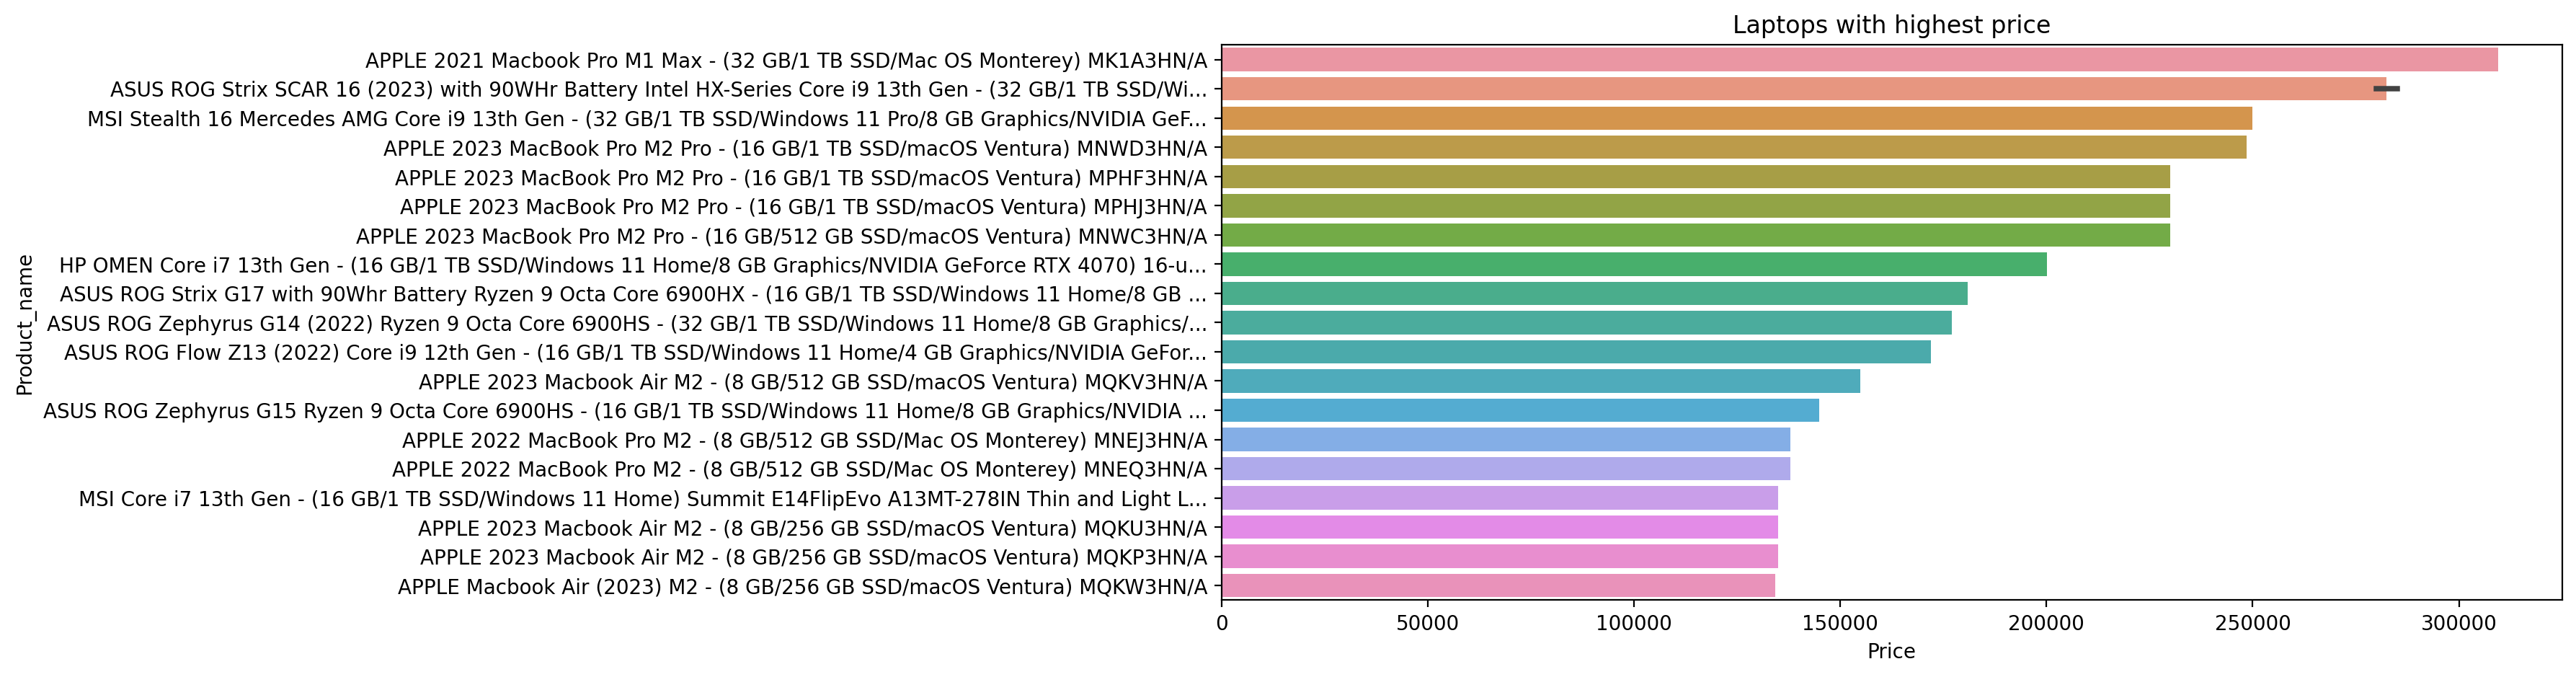

In [457]:
plt.figure(figsize=(12,5),dpi=200)
plt.title("Laptops with highest price")
sns.barplot("Price","Product_name",data=top_price)

<AxesSubplot:title={'center':'No.of highest priced laptops by each brand'}, ylabel='Brand'>

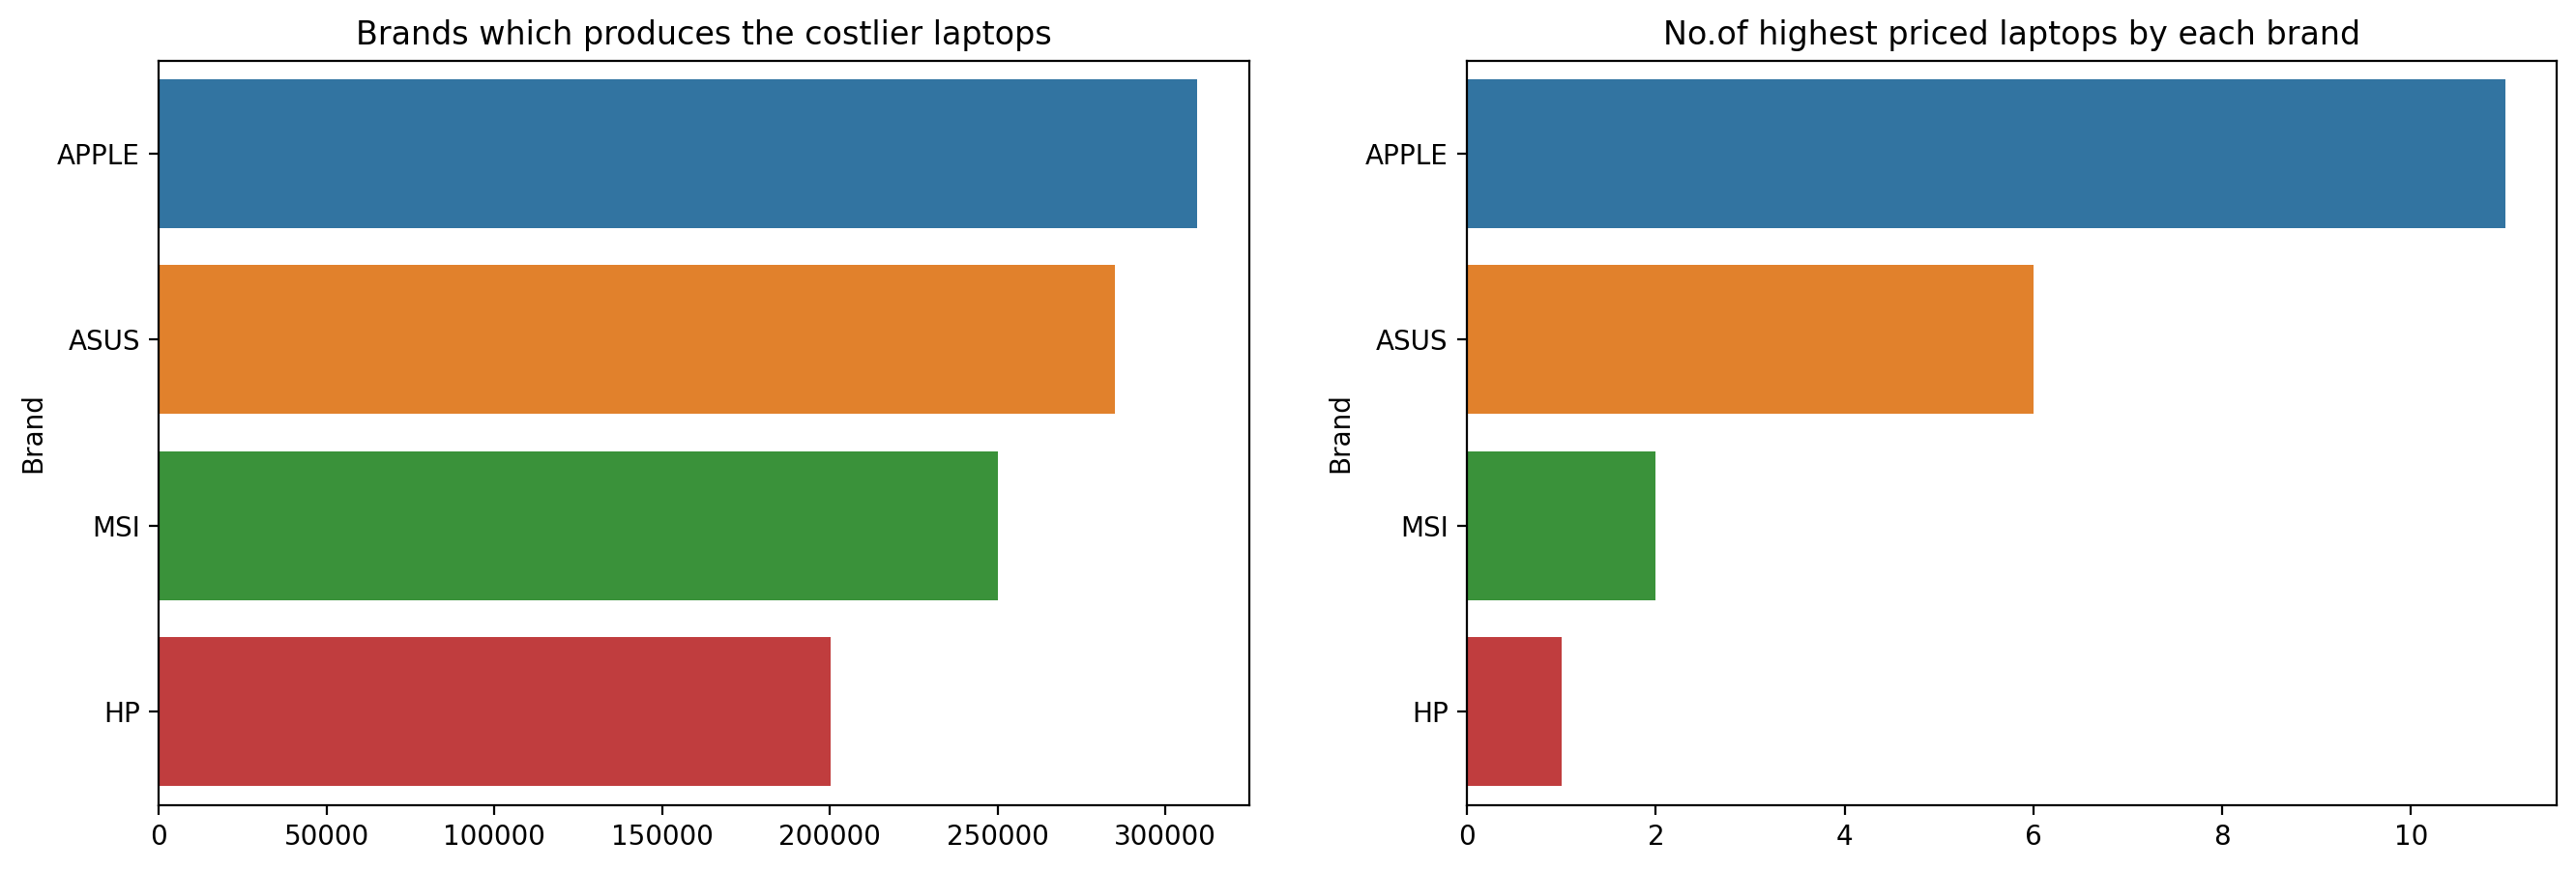

In [458]:
plt.figure(figsize=(16,5),dpi=200)
plt.subplot(1,2,1)
plt.title("Brands which produces the costlier laptops")
sns.barplot(a.values,a.index)


plt.subplot(1,2,2)
plt.title("No.of highest priced laptops by each brand")
sns.barplot(b.values,b.index)

In [459]:
df.query("Price==Price.min()")

Brand                                       Product_name  \
12  ASUS  ASUS Chromebook Celeron Dual Core - (4 GB/64 G...   

                  Processor          RAM            SSD        Type  \
12  Intel Celeron Dual Core  4 GB LPDDR4  Not Available  Chromebook   

   Display_Size  No_of_ratings  No_of_reviews  Rating    Price  
12     29.46 cm            427             53     3.6  14990.0

## =======================================================================

### Report 

By scraping the details of laptops in the first 20 webpages of flipkart

- The brands which came in the top priced laptops are APPLE,ASUS, MSI and HP. 

- Apple 2021 Macbook pro M1 Max is the highest priced laptop with a cost of RS.309490, ASUS ROG strix SCAR 16 is the second
  highest of RS. 284990, MSI stealth 16 Mercedes AMG being the third highest at a cost of RS.249990 and HP OMEN core i7
  13th generation is the fourth with a cost of RS.200198. 
  
- ASUS chromebook celeron Dual core is the least priced laptop available in the scraped flipkart webpages with a cost of 
  Rs.14990 only.

## =======================================================================


### Analysis on Type

In [460]:
df["Type"].value_counts()

Laptop            117
Thin and Light     91
Vivobook           41
Gaming             23
Macbook             7
Notebook            6
Chromebook          2
2 in 1              1
Creator             1
Business            1
Name: Type, dtype: int64

<AxesSubplot:xlabel='Type', ylabel='count'>

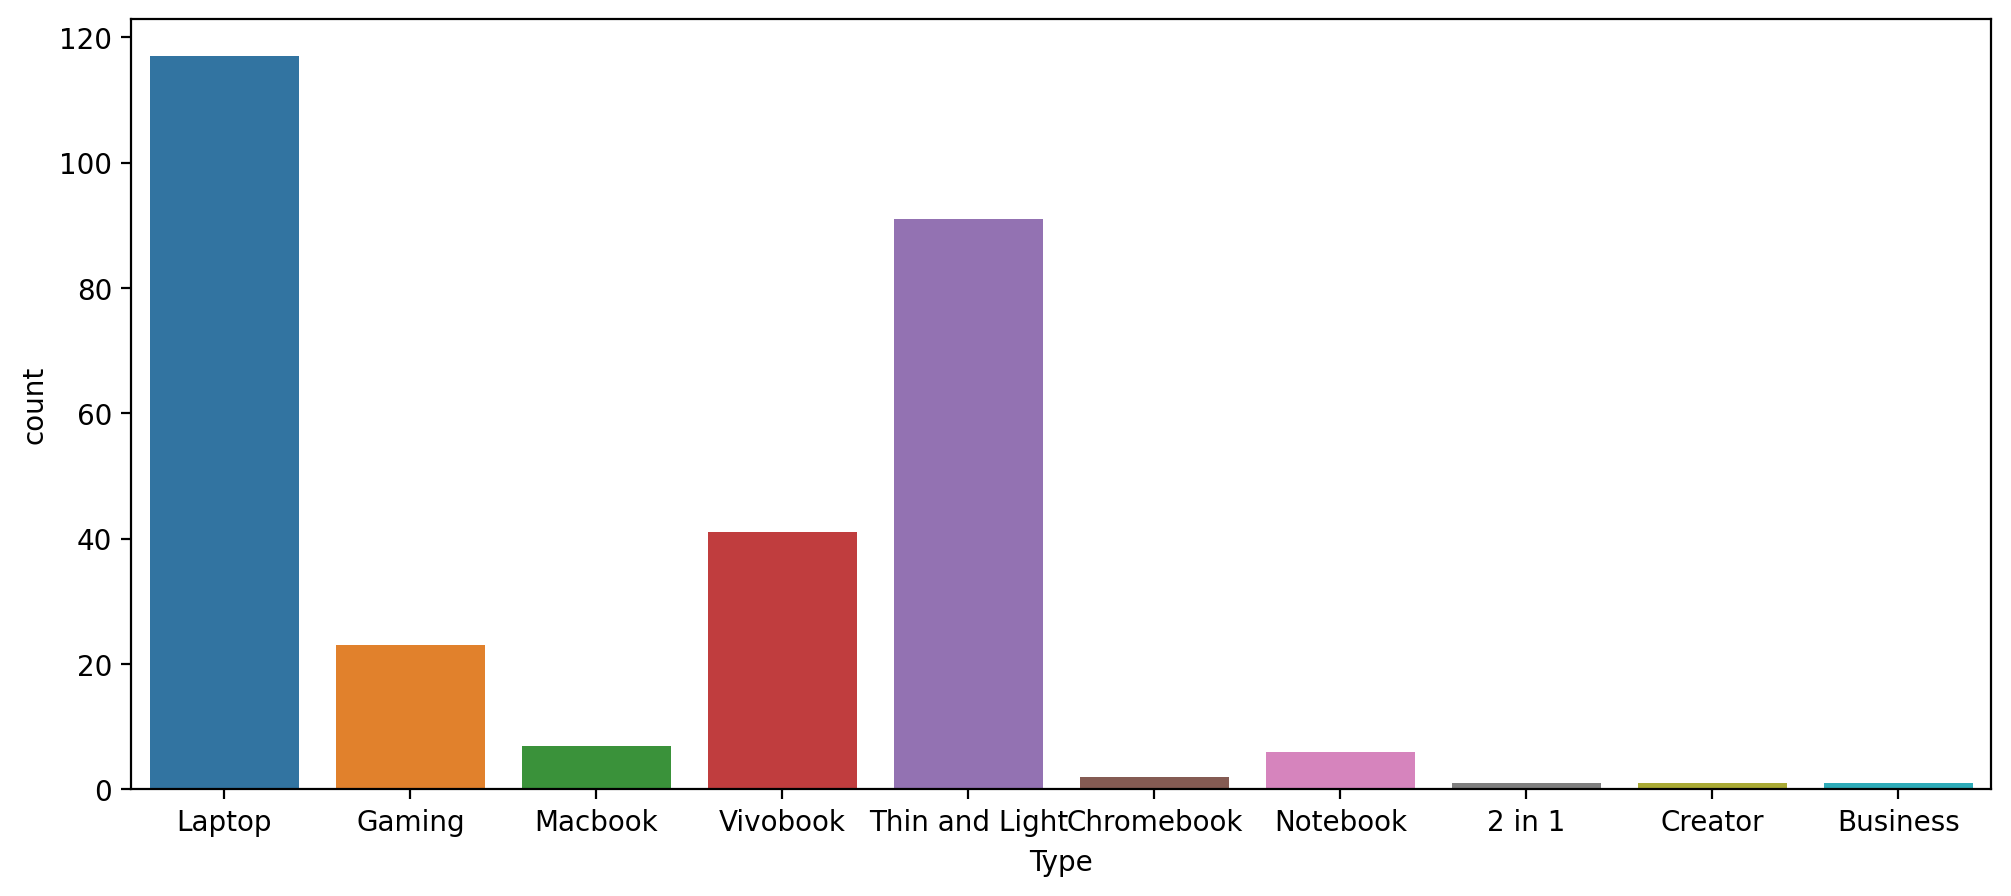

In [461]:
plt.figure(figsize=(12,5),dpi=200)
sns.countplot(df.Type)

## =========================================================================

### Report on Type
 
- There are several varieties of laptops available which can be used for different purposes like gaming, business etc. .

## =========================================================================

### Analysis on memory

In [462]:
ram=df["RAM"].value_counts()
ram

8 GB DDR4               125
16 GB DDR4               69
16 GB DDR5               22
8 GB Unified Memory      11
8 GB LPDDR4X             11
16 GB LPDDR5             11
8 GB LPDDR5               9
16 GB LPDDR4X             9
32 GB DDR5                4
4 GB DDR4                 4
16 GB Unified Memory      4
8 GB DDR5                 3
4 GB LPDDR4               2
LPDDR5                    2
16 GB LPDDR5X             1
16 GB DDR                 1
8 GB DDR                  1
32 GB Unified Memory      1
Name: RAM, dtype: int64

<AxesSubplot:title={'center':'RAM'}>

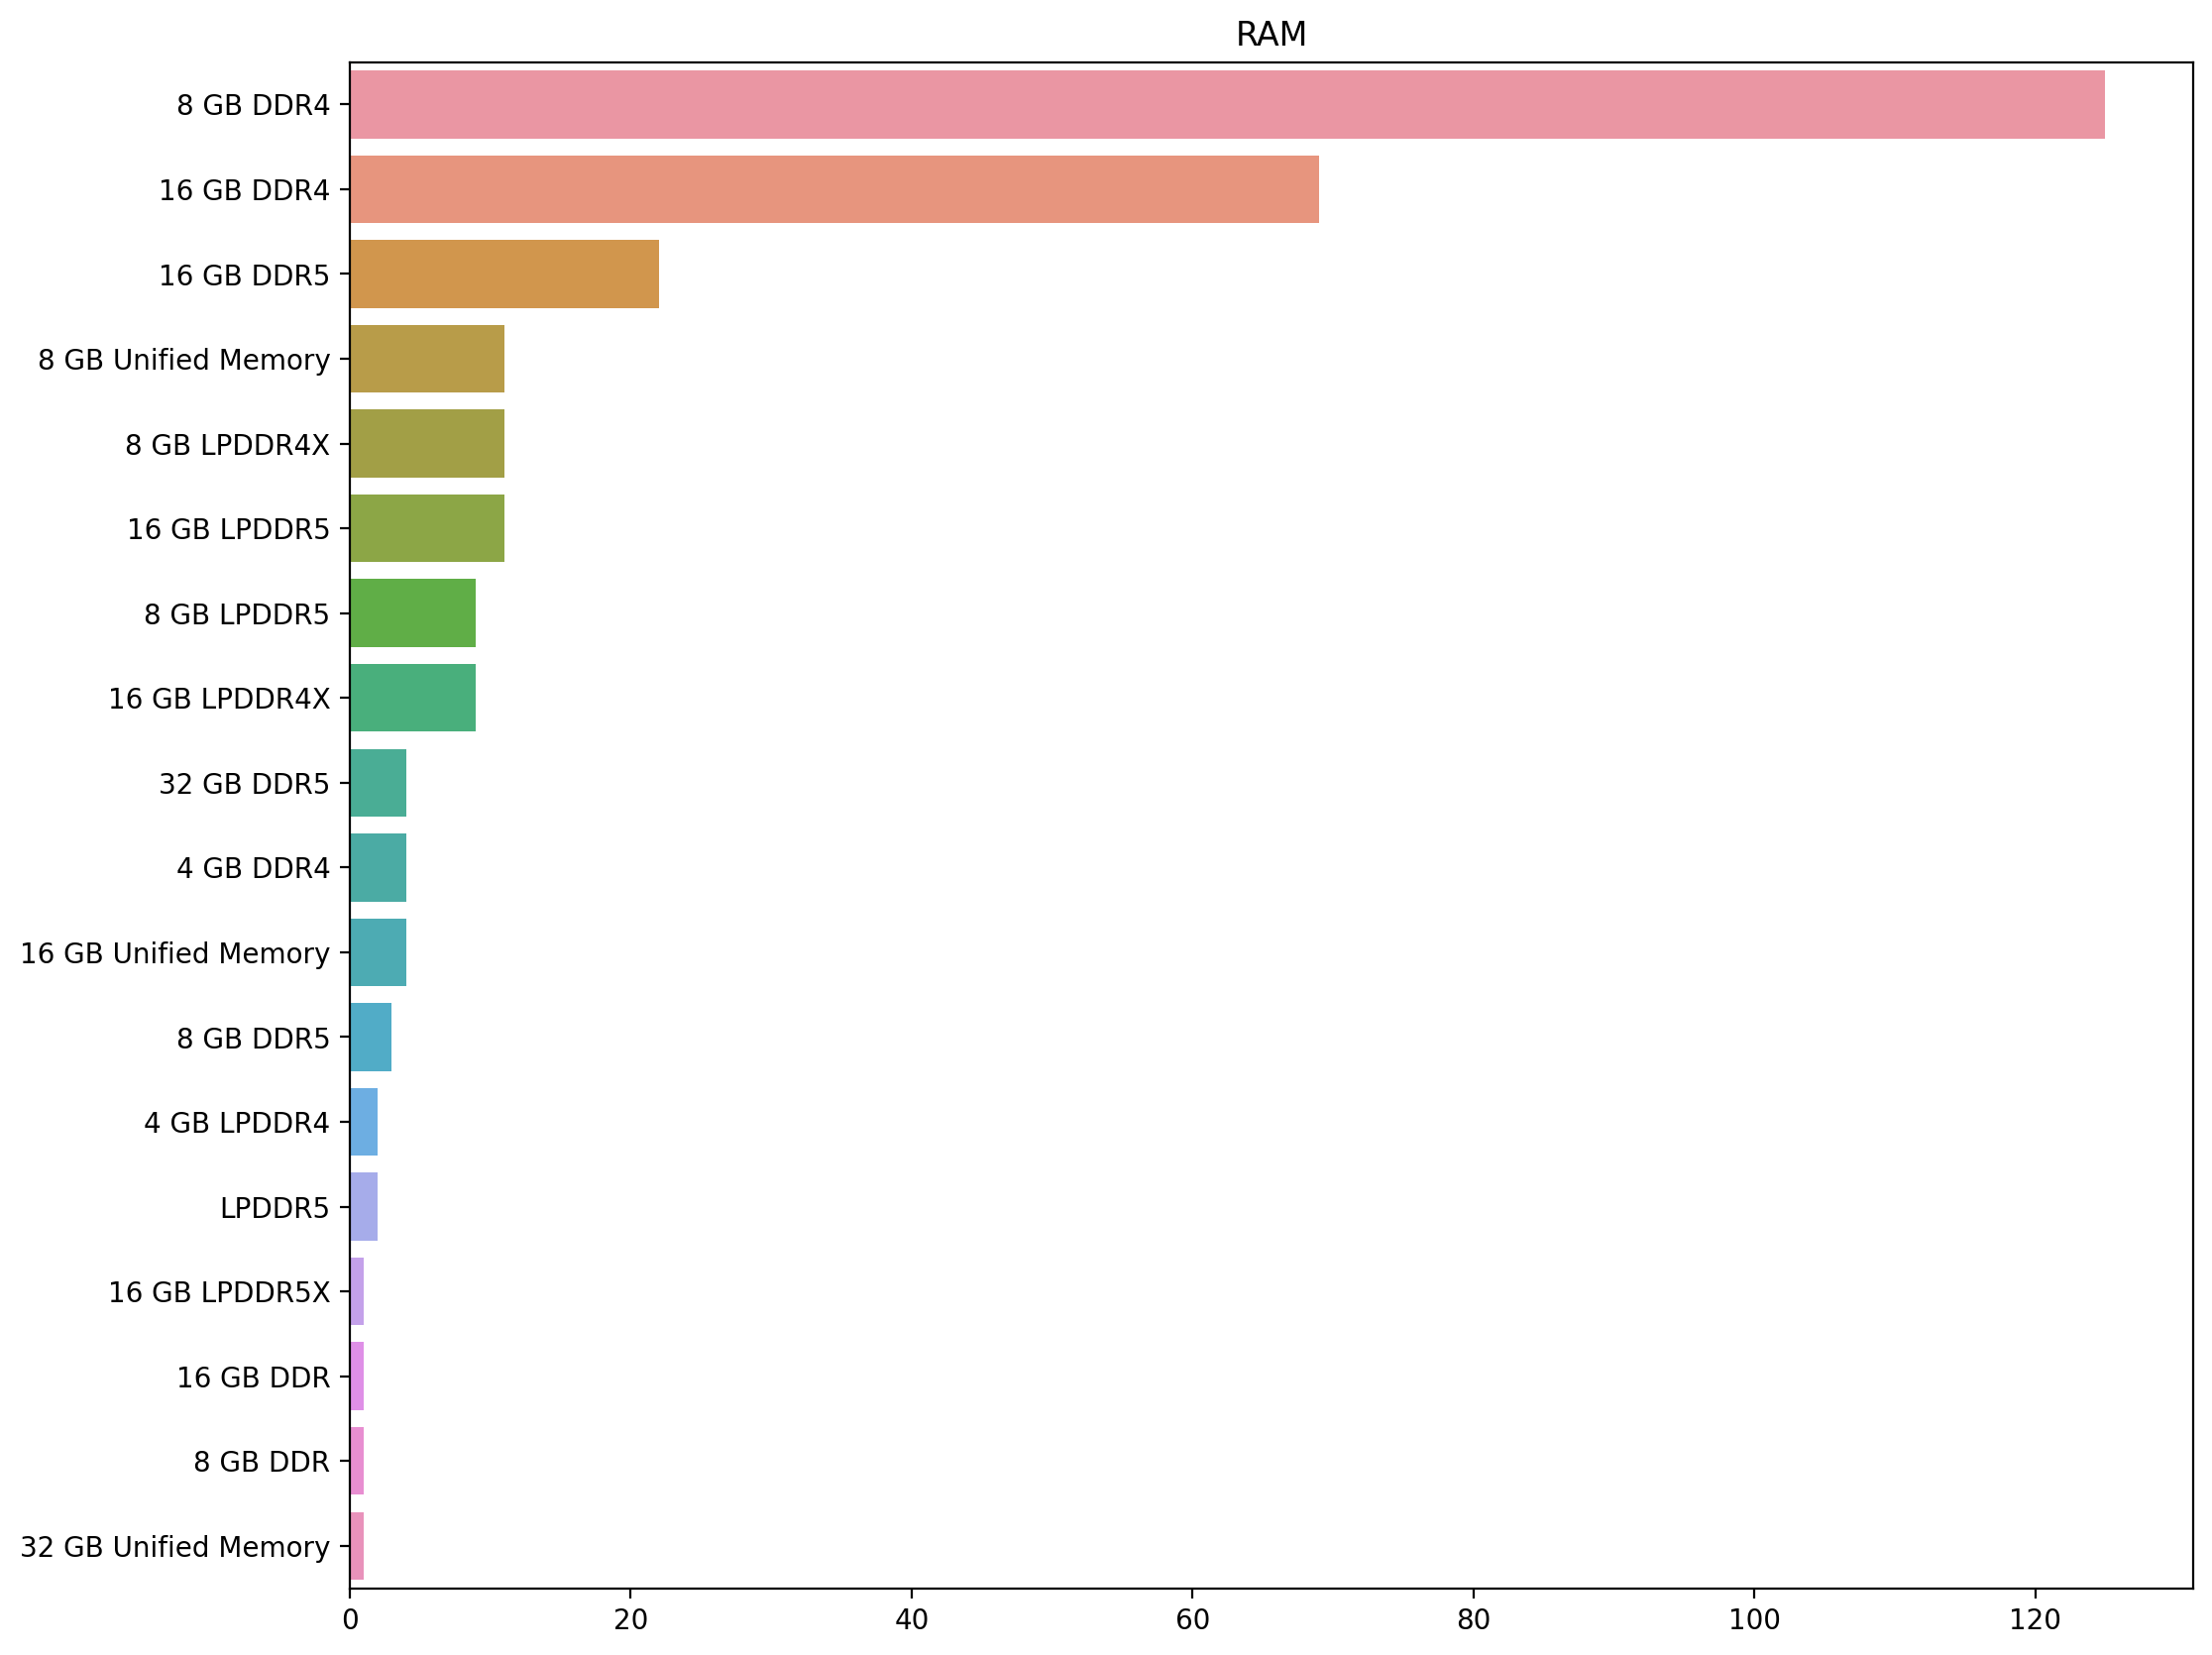

In [463]:
plt.figure(figsize=(12,10),dpi=200),
plt.title("RAM")
sns.barplot(ram.values,ram.index)

## ==========================================================================

#### Report on memory

- RAM
   - out of 290 laptops scraped 125 laptops where having a RAM of 8 GB DDR4.
   - 16 GB DDR4 and 16 GB DDR5 where the second and third highest used RAM in most other laptops.

## ==========================================================================

### Analysis on Rating

In [488]:
df["Rating"].value_counts().sort_index(ascending=False)

5.0      2
4.8     13
4.7     10
4.6      6
4.5     14
4.4     28
4.3    112
4.2     30
4.1     36
4.0     12
3.9     14
3.8      6
3.7      5
3.6      1
3.4      1
Name: Rating, dtype: int64

In [465]:
top_rated=df.sort_values("Rating",ascending=False)[df["Rating"]>=4.5]
top_rated

Brand                                       Product_name  \
118    APPLE  APPLE 2023 MacBook Pro M2 Pro - (16 GB/512 GB ...   
408    APPLE  APPLE 2023 MacBook Pro M2 Pro - (16 GB/1 TB SS...   
398     ASUS  ASUS TUF GAMING A15 Ryzen 7 Octa Core 4800H - ...   
188     ASUS  ASUS Core i3 13th Gen - (8 GB/512 GB SSD/Windo...   
345    APPLE  APPLE 2022 MacBook AIR M2 - (8 GB/256 GB SSD/M...   
228    APPLE  APPLE Macbook Air (2023) M2 - (8 GB/256 GB SSD...   
302     DELL  DELL Core i5 12th Gen - (8 GB/1 TB HDD/256 GB ...   
249    APPLE  APPLE 2023 Macbook Air M2 - (8 GB/256 GB SSD/m...   
389    APPLE  APPLE 2022 MacBook Pro M2 - (8 GB/512 GB SSD/M...   
415    APPLE  APPLE 2023 Macbook Air M2 - (8 GB/256 GB SSD/m...   
138   Lenovo  Lenovo LOQ Core i5 12th Gen - (16 GB/512 GB SS...   
445    APPLE  APPLE 2023 Macbook Air M2 - (8 GB/512 GB SSD/m...   
63     APPLE  APPLE 2022 MacBook AIR M2 - (8 GB/256 GB SSD/M...   
109       HP  HP 15s (2023) Intel Core i5 13th Gen - (8 GB/1...   
100   Lenovo  Lenovo LOQ Core i5 12th Gen - (16 GB/512 GB SS...   
442       HP  HP Core i3 11th Gen - (8 GB/512 GB SSD/Windows...   
113      MSI  MSI Katana 15 Core i5 12th Gen - (16 GB/1 TB S...   
375      MSI  MSI Katana 15 Core i5 12th Gen - (16 GB/512 GB...   
268    APPLE  APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/M...   
83        HP  HP Victus Core i7 12th Gen - (16 GB/512 GB SSD...   
462   Lenovo  Lenovo ThinkPad E15 Core i5 11th Gen - (8 GB/5...   
343     ASUS  ASUS Zenbook 14 OLED (2023) Intel EVO P-Series...   
2      APPLE  APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/M...   
238     ASUS  ASUS Vivobook 16 (2023) Core i3 13th Gen - (8 ...   
329     ASUS  ASUS TUF Gaming F15 Core i5 12th Gen - (16 GB/...   
242     ASUS  ASUS Vivobook 15 Core i3 12th Gen - (8 GB/512 ...   
125     ASUS  ASUS Vivobook 16 (2023) Core i5 13th Gen - (16...   
262     ASUS  ASUS TUF Gaming F15 (2023) with 90WHr Battery ...   
358    APPLE  APPLE 2022 MacBook AIR M2 - (8 GB/256 GB SSD/M...   
198     ASUS  ASUS Zenbook 14X OLED Ryzen 5 Hexa Core 5600H ...   
106   Lenovo  Lenovo LOQ Ryzen 7 Octa Core 7840HS - (16 GB/5...   
245   Lenovo  Lenovo IdeaPad Gaming 3 Intel Core i7 10th Gen...   
252    APPLE  APPLE 2022 MacBook Pro M2 - (8 GB/256 GB SSD/M...   
212     ASUS  ASUS VivoBook K15 OLED (2022) Core i3 11th Gen...   
277   Lenovo  Lenovo Ideapad Gaming 3 AMD Ryzen 7 Octa Core ...   
73   SAMSUNG  SAMSUNG Galaxy Book2 Core i5 12th Gen - (16 GB...   
284     ASUS  ASUS TUF Gaming A17 Ryzen 7 Octa Core AMD R7-4...   
294     ASUS  ASUS Vivobook Go 15 OLED (2023) Ryzen 5 Quad C...   
295     ASUS  ASUS Zenbook 14 OLED (2023) Ryzen 7 Octa Core ...   
179     ASUS  ASUS Vivobook 15 OLED (2022) Core i5 12th Gen ...   
348   Lenovo  Lenovo Legion 5 AMD Ryzen 7 Octa Core 5800H - ...   
364    APPLE  APPLE 2022 MacBook Pro M2 - (8 GB/512 GB SSD/M...   
114     ASUS  ASUS ROG Strix G15 (2022) Ryzen 7 Octa Core AM...   
435    APPLE  APPLE 2022 MacBook Pro M2 - (8 GB/256 GB SSD/M...   
458     ASUS  ASUS Vivobook 16 (2023) Ryzen 5 Hexa Core 7530...   

                 Processor                   RAM     SSD            Type  \
118           Apple M2 Pro  16 GB Unified Memory  512 GB          Laptop   
408           Apple M2 Pro  16 GB Unified Memory    1 TB          Laptop   
398  AMD Ryzen 7 Octa Core            16 GB DDR4  512 GB          Laptop   
188          Intel Core i3             8 GB DDR5  512 GB          Laptop   
345               Apple M2   8 GB Unified Memory  256 GB          Laptop   
228               Apple M2   8 GB Unified Memory  256 GB         Macbook   
302          Intel Core i5             8 GB DDR4  256 GB          Laptop   
249               Apple M2   8 GB Unified Memory  256 GB         Macbook   
389               Apple M2   8 GB Unified Memory  512 GB          Laptop   
415               Apple M2   8 GB Unified Memory  256 GB         Macbook   
138          Intel Core i5            16 GB DDR5  512 GB          Laptop   
445         

In [466]:
rating_plot=top_rated.groupby("Brand")["Rating"].count()
rating_plot

Brand
APPLE      15
ASUS       16
DELL        1
HP          3
Lenovo      7
MSI         2
SAMSUNG     1
Name: Rating, dtype: int64

In [479]:
top_rated["Rating"].count()

45

<AxesSubplot:title={'center':'No.of types of top rated laptops by each brand'}, ylabel='Brand'>

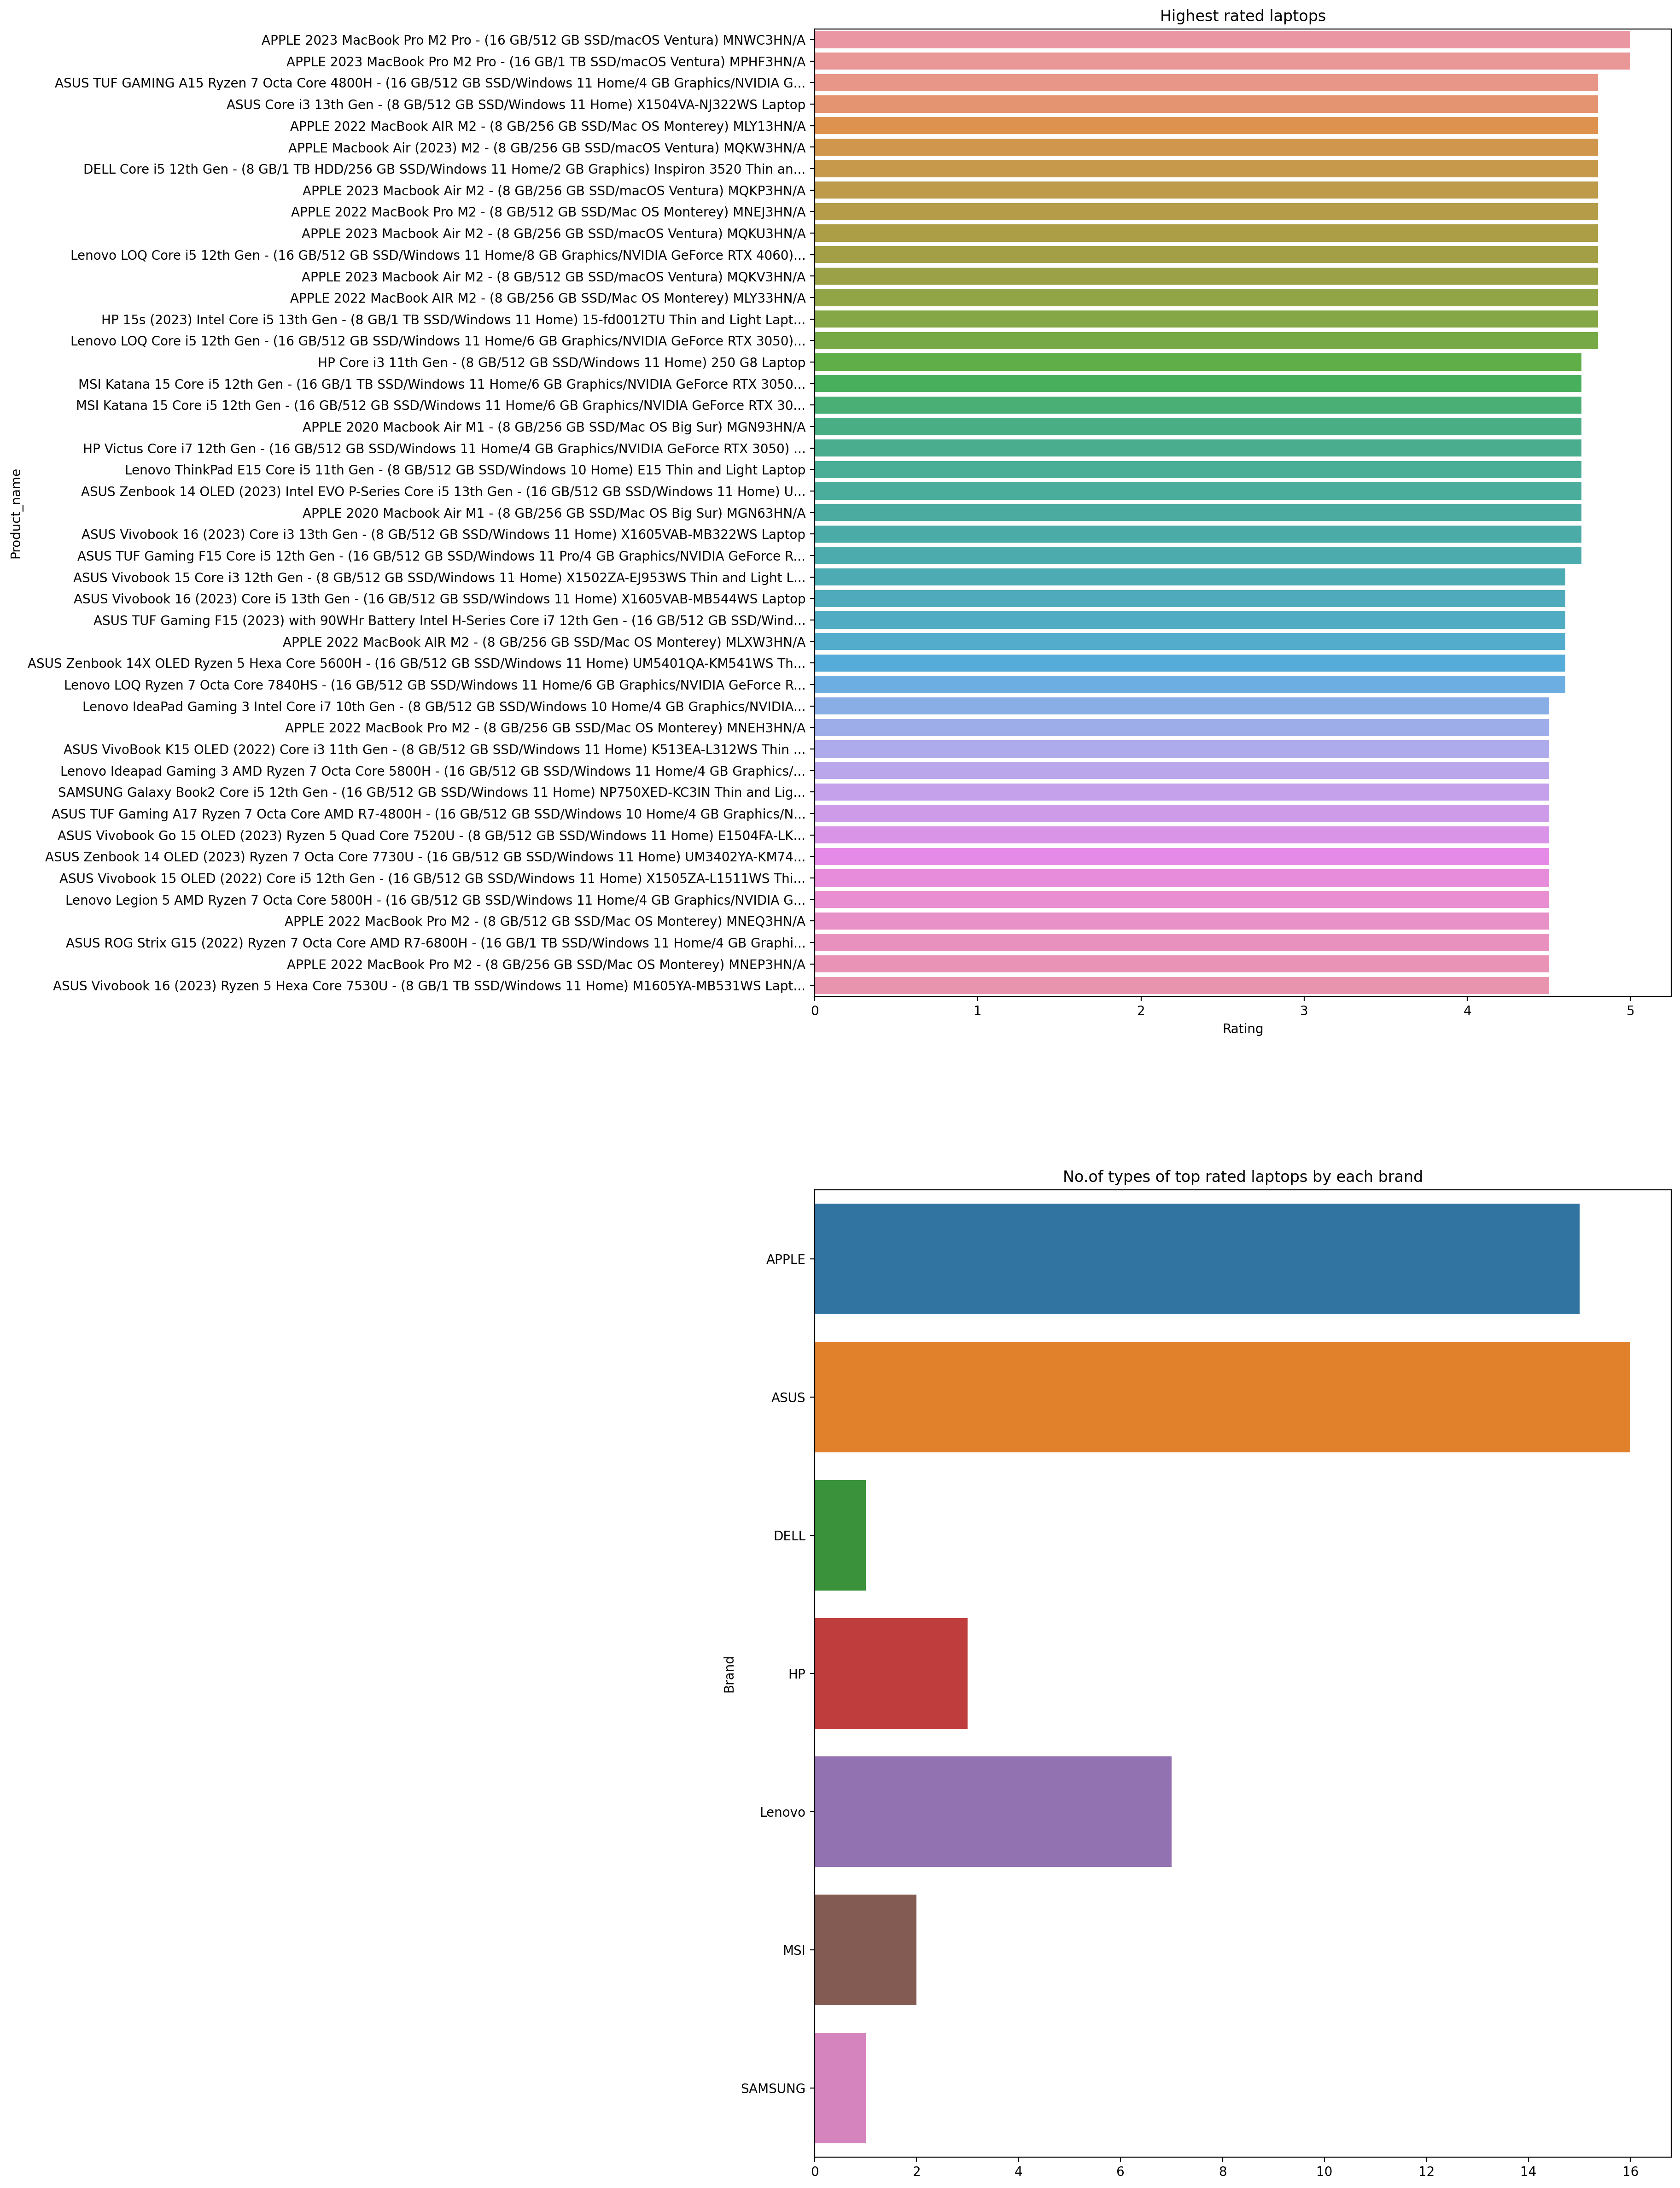

In [478]:
plt.figure(figsize=(12,30),dpi=200)

plt.subplot(2,1,1)
plt.title("Highest rated laptops")
sns.barplot("Rating","Product_name",data=top_rated)

plt.subplot(2,1,2)
plt.title("No.of types of top rated laptops by each brand")
sns.barplot(rating_plot.values,rating_plot.index)

## ==========================================================================

### Report on the ratings

- APPLE 2023 MacBook Pro M2 Pro with 512GB SSD and 1 TB SSD are the highest rated laptop with a rating of 5.0*

- 45 laptops have a rating of 4.5 and more. And among them 16 are from the brand ASUS, 15 from Apple, 7 from Lenovo,3 from 
  HP, 2 from MSI and 1 each from SAMSUNG and Dell.
  
- Almost 112 laptops are having a rating of 4.3 

## ==========================================================================

### Analysis on No.of Ratings and Reviews

In [489]:
num_ratings=df.sort_values("No_of_ratings",ascending=False).head(20)
num_ratings

Brand                                       Product_name  \
32    realme  realme Book (Slim) Core i3 11th Gen - (8 GB/25...   
2      APPLE  APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/M...   
268    APPLE  APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/M...   
25    Lenovo  Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen -...   
178     ASUS  ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...   
14        HP  HP 14s Intel Core i3 11th Gen - (8 GB/512 GB S...   
3       ASUS  ASUS Vivobook 15 Core i3 11th Gen - (8 GB/512 ...   
368     ASUS  ASUS Vivobook 15 Core i3 11th Gen - (8 GB/512 ...   
319  Infinix  Infinix INBook X1 Neo Series Celeron Quad Core...   
95    Lenovo  Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...   
9         HP  HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...   
55      ASUS  ASUS Vivobook 15 Core i5 11th Gen - (16 GB/512...   
22      ASUS  ASUS Vivobook 15 Core i5 11th Gen - (8 GB/512 ...   
135     ASUS  ASUS VivoBook 14 (2021) Celeron Dual Core - (4...   
62        HP  HP Ryzen 3 Quad Core 5300U - (8 GB/512 GB SSD/...   
33        HP  HP Ryzen 3 Quad Core 5300U - (8 GB/512 GB SSD/...   
115   Lenovo  Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U - (8 ...   
168   Lenovo  Lenovo IdeaPad Ryzen 5 Hexa Core 5500U - (16 G...   
35   Infinix  Infinix Y1 Plus Neo Intel Celeron Quad Core 11...   
443  Infinix  Infinix Y1 Plus Neo Intel Celeron Quad Core 11...   

                   Processor           RAM     SSD            Type  \
32             Intel Core i3     8 GB DDR4  256 GB  Thin and Light   
2                   Apple M1     8 GB DDR4  256 GB         Macbook   
268                 Apple M1     8 GB DDR4  256 GB         Macbook   
25             Intel Core i3     8 GB DDR4  512 GB          Laptop   
178            Intel Core i5     8 GB DDR4  512 GB          Gaming   
14             Intel Core i3     8 GB DDR4  512 GB  Thin and Light   
3              Intel Core i3     8 GB DDR4  512 GB        Vivobook   
368            Intel Core i3     8 GB DDR4  512 GB        Vivobook   
319  Intel Celeron Quad Core  8 GB LPDDR4X  256 GB  Thin and Light   
95             Intel Core i5     8 GB DDR4  512 GB          Gaming   
9              Intel Core i3     8 GB DDR4  256 GB  Thin and Light   
55             Intel Core i5    16 GB DDR4  512 GB        Vivobook   
22             Intel Core i5     8 GB DDR4  512 GB        Vivobook   
135  Intel Celeron Dual Core     4 GB DDR4  256 GB          Laptop   
62     AMD Ryzen 3 Quad Core     8 GB DDR4  512 GB  Thin and Light   
33     AMD Ryzen 3 Quad Core     8 GB DDR4  512 GB  Thin and Light   
115    AMD Ryzen 5 Hexa Core     8 GB DDR4  512 GB  Thin and Light   
168    AMD Ryzen 5 Hexa Core    16 GB DDR4  512 GB  Thin and Light   
35   Intel Celeron Quad Core  8 GB LPDDR4X  512 GB          Laptop   
443  Intel Celeron Quad Core  8 GB LPDDR4X  256 GB          Laptop   

    Display_Size  No_of_ratings  No_of_reviews  Rating    Price  
32       14 inch          14561           2078     4.4  36999.0  
2       33.78 cm          11346            982     4.7  81990.0  
268     33.78 cm          11346            982     4.7  81990.0  
25      39.62 cm           6954            641     4.3  38190.0  
178     39.62 cm           6642            638     4.4  58990.0  
14      35.56 cm           5406            455     4.3  37890.0  
3       39.62 cm           4561            411     4.3  37990.0  
368     39.62 cm           4561            411     4.3  35990.0  
319     35.56 cm           4166            575     4.2  24990.0  
95     100.63 cm           3806            330     4.3  55430.0  
9       35.56 cm           3674            304     4.3  35490.0  
55      39.62 cm           2781            217     4.3  50990.0  
22      39.62 cm           2781            217     4.3  47990.0  
135     35.56 cm           2749            293     4.1  25990.0  
62      39.62 cm           2678            291     4.2  35890.0  
33      35.56 cm           2475            311     4.3  37440.0  
115   

In [490]:
num_reviews=df.sort_values("No_of_reviews",ascending=False).head(20)
num_reviews

Brand                                       Product_name  \
32    realme  realme Book (Slim) Core i3 11th Gen - (8 GB/25...   
2      APPLE  APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/M...   
268    APPLE  APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/M...   
25    Lenovo  Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen -...   
178     ASUS  ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...   
319  Infinix  Infinix INBook X1 Neo Series Celeron Quad Core...   
14        HP  HP 14s Intel Core i3 11th Gen - (8 GB/512 GB S...   
3       ASUS  ASUS Vivobook 15 Core i3 11th Gen - (8 GB/512 ...   
368     ASUS  ASUS Vivobook 15 Core i3 11th Gen - (8 GB/512 ...   
95    Lenovo  Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...   
33        HP  HP Ryzen 3 Quad Core 5300U - (8 GB/512 GB SSD/...   
443  Infinix  Infinix Y1 Plus Neo Intel Celeron Quad Core 11...   
35   Infinix  Infinix Y1 Plus Neo Intel Celeron Quad Core 11...   
9         HP  HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...   
135     ASUS  ASUS VivoBook 14 (2021) Celeron Dual Core - (4...   
62        HP  HP Ryzen 3 Quad Core 5300U - (8 GB/512 GB SSD/...   
304     ASUS  ASUS VivoBook K15 OLED (2022) Core i3 11th Gen...   
115   Lenovo  Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U - (8 ...   
168   Lenovo  Lenovo IdeaPad Ryzen 5 Hexa Core 5500U - (16 G...   
13   Infinix  Infinix INBook Y1 Plus Intel Core i3 10th Gen ...   

                   Processor           RAM     SSD            Type  \
32             Intel Core i3     8 GB DDR4  256 GB  Thin and Light   
2                   Apple M1     8 GB DDR4  256 GB         Macbook   
268                 Apple M1     8 GB DDR4  256 GB         Macbook   
25             Intel Core i3     8 GB DDR4  512 GB          Laptop   
178            Intel Core i5     8 GB DDR4  512 GB          Gaming   
319  Intel Celeron Quad Core  8 GB LPDDR4X  256 GB  Thin and Light   
14             Intel Core i3     8 GB DDR4  512 GB  Thin and Light   
3              Intel Core i3     8 GB DDR4  512 GB        Vivobook   
368            Intel Core i3     8 GB DDR4  512 GB        Vivobook   
95             Intel Core i5     8 GB DDR4  512 GB          Gaming   
33     AMD Ryzen 3 Quad Core     8 GB DDR4  512 GB  Thin and Light   
443  Intel Celeron Quad Core  8 GB LPDDR4X  256 GB          Laptop   
35   Intel Celeron Quad Core  8 GB LPDDR4X  512 GB          Laptop   
9              Intel Core i3     8 GB DDR4  256 GB  Thin and Light   
135  Intel Celeron Dual Core     4 GB DDR4  256 GB          Laptop   
62     AMD Ryzen 3 Quad Core     8 GB DDR4  512 GB  Thin and Light   
304            Intel Core i3     8 GB DDR4  256 GB          Laptop   
115    AMD Ryzen 5 Hexa Core     8 GB DDR4  512 GB  Thin and Light   
168    AMD Ryzen 5 Hexa Core    16 GB DDR4  512 GB  Thin and Light   
13             Intel Core i3  8 GB LPDDR4X  512 GB  Thin and Light   

    Display_Size  No_of_ratings  No_of_reviews  Rating    Price  
32       14 inch          14561           2078     4.4  36999.0  
2       33.78 cm          11346            982     4.7  81990.0  
268     33.78 cm          11346            982     4.7  81990.0  
25      39.62 cm           6954            641     4.3  38190.0  
178     39.62 cm           6642            638     4.4  58990.0  
319     35.56 cm           4166            575     4.2  24990.0  
14      35.56 cm           5406            455     4.3  37890.0  
3       39.62 cm           4561            411     4.3  37990.0  
368     39.62 cm           4561            411     4.3  35990.0  
95     100.63 cm           3806            330     4.3  55430.0  
33      35.56 cm           2475            311     4.3  37440.0  
443     39.01 cm           1987            306     4.1  23990.0  
35      39.01 cm           1987            306     4.1  24490.0  
9       35.56 cm           3674            304     4.3  35490.0  
135     35.56 cm           2749            293     4.1  25990.0  
62      39.62 cm           2678            291     4.2  35890.0  
304   

In [495]:
n_ratings=num_ratings.groupby("Brand")["No_of_ratings"].count().sort_values(ascending=False)
n_ratings

Brand
ASUS       6
HP         4
Lenovo     4
Infinix    3
APPLE      2
realme     1
Name: No_of_ratings, dtype: int64

In [496]:
n_reviews=num_reviews.groupby("Brand")["No_of_reviews"].count().sort_values(ascending=False)
n_reviews

Brand
ASUS       5
HP         4
Infinix    4
Lenovo     4
APPLE      2
realme     1
Name: No_of_reviews, dtype: int64

<AxesSubplot:title={'center':'Brands with no.of laptops having highest no.of reviews'}, ylabel='Brand'>

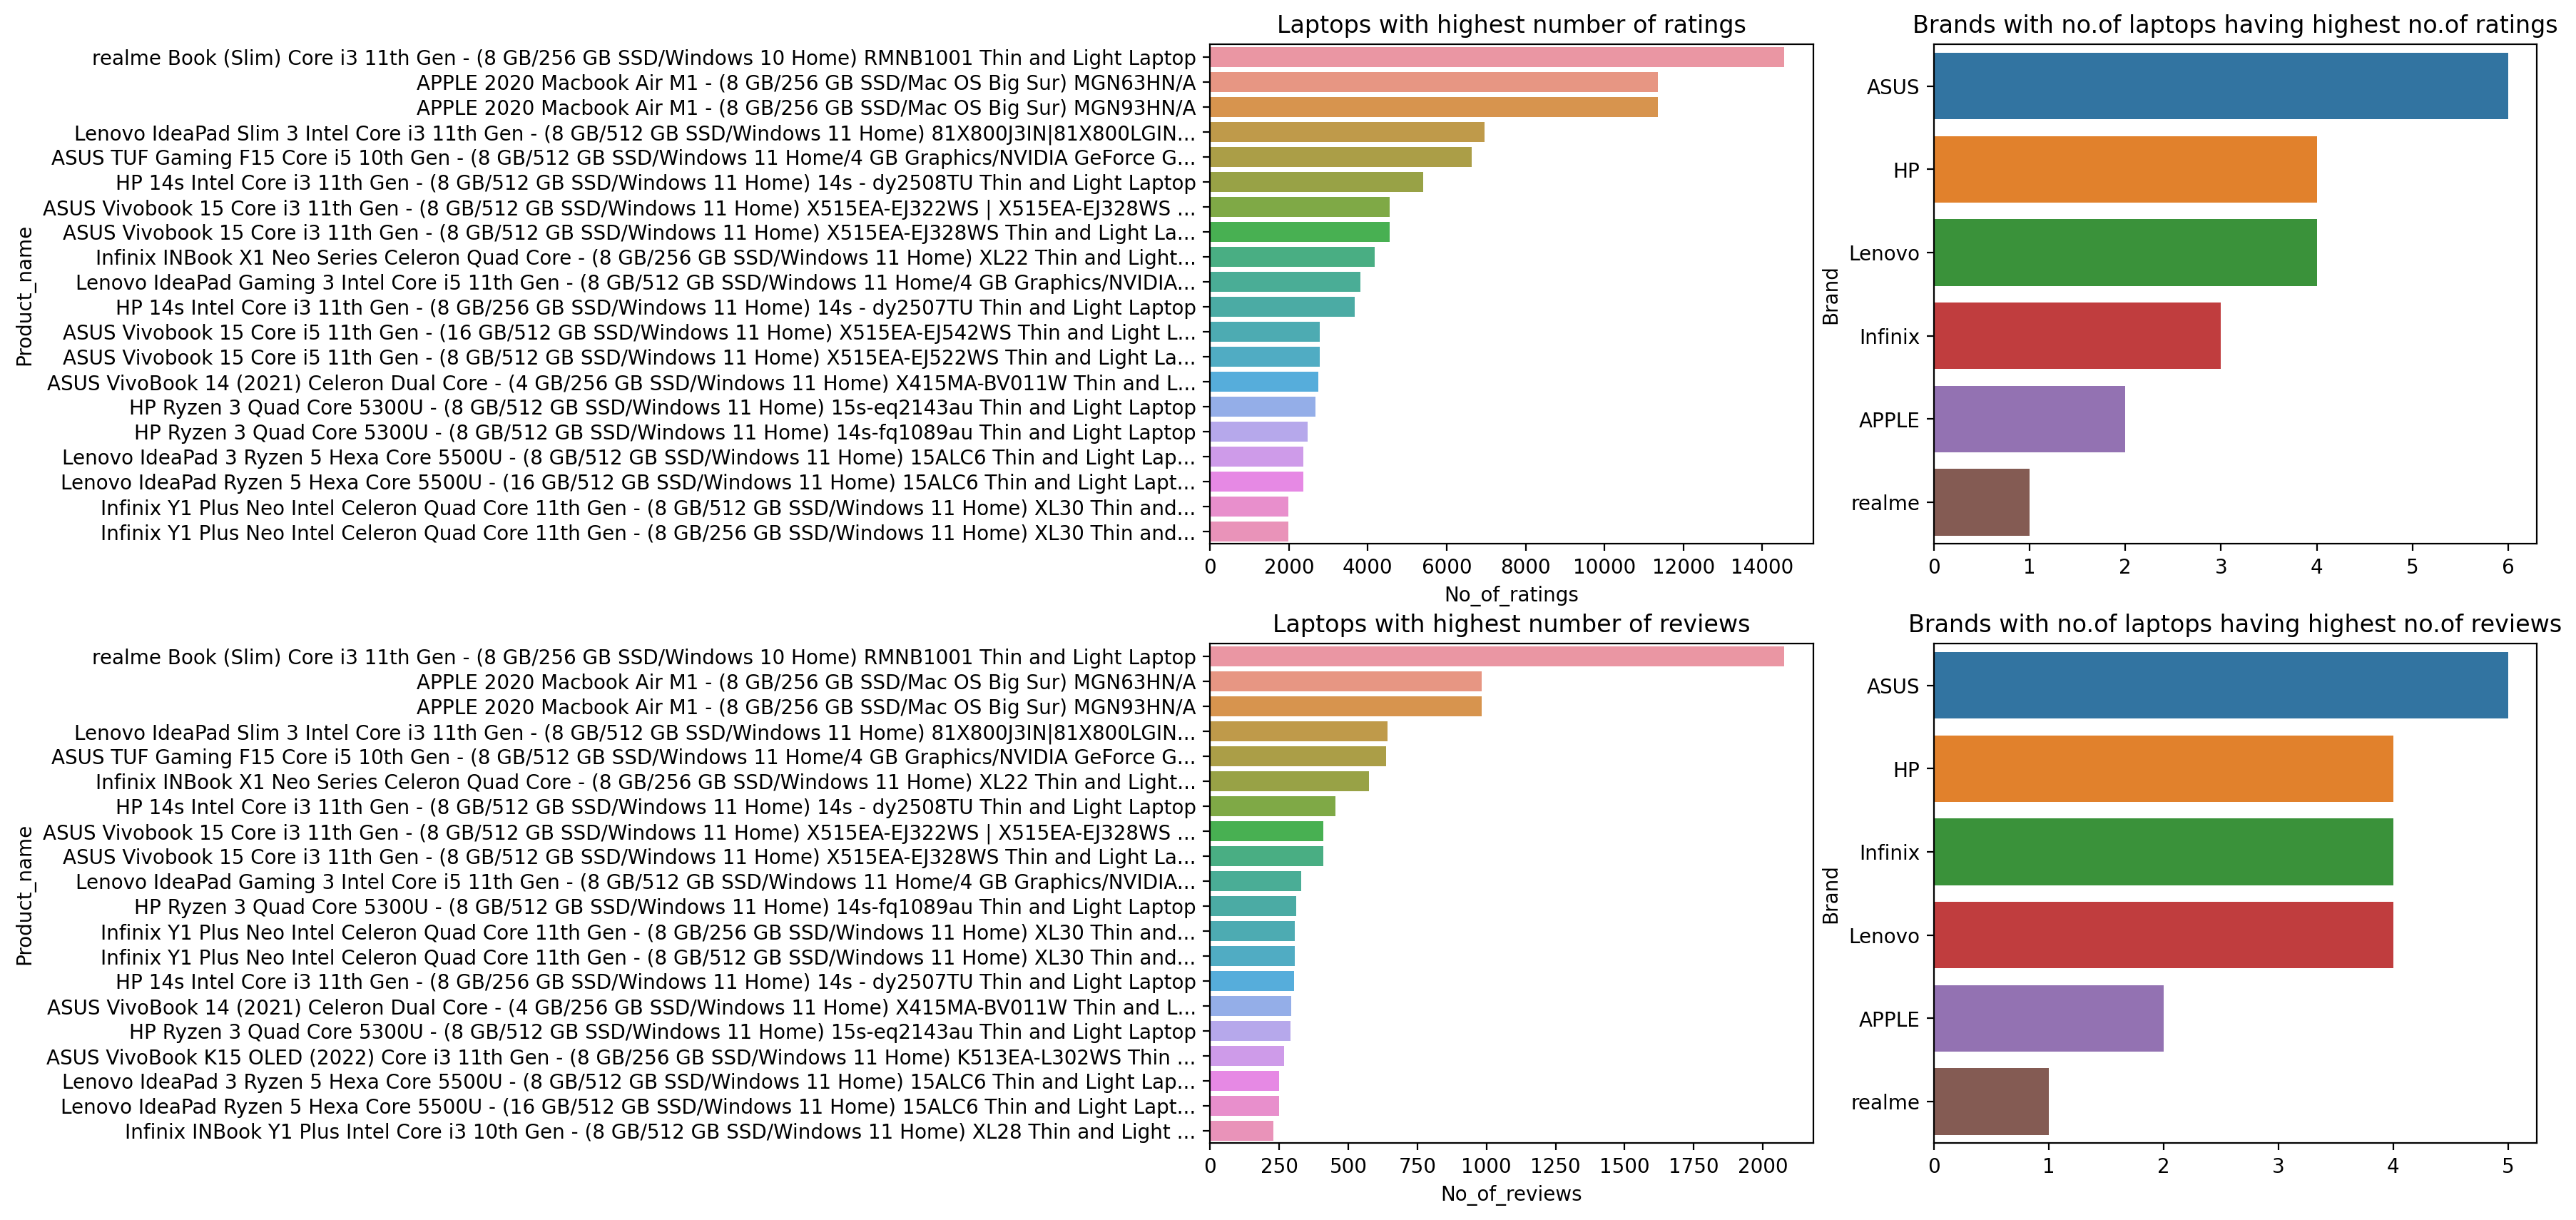

In [497]:
plt.figure(figsize=(12,10),dpi=200)

plt.subplot(2,2,1)
plt.title("Laptops with highest number of ratings")
sns.barplot("No_of_ratings","Product_name",data=num_ratings)

plt.subplot(2,2,2)
plt.title("Brands with no.of laptops having highest no.of ratings")
sns.barplot( n_ratings.values,n_ratings.index)

plt.subplot(2,2,3)
plt.title("Laptops with highest number of reviews")
sns.barplot("No_of_reviews","Product_name",data=num_reviews)

plt.subplot(2,2,4)
plt.title("Brands with no.of laptops having highest no.of reviews")
sns.barplot(n_reviews.values,n_reviews.index)

## ==========================================================================

### Report on No.of Ratings and Reviews

- No.of Ratings
    - out of the 290 laptops analysed Realme Book(Slim) has got the highest ratings. Apple 2020 Macbook Air M1 2 versions 
      has the second and third highest ratings in number.
    - Among the top 20 laptops with highest number of ratings 6 laptops are from the ASUS, 4 from HP and LENOVO, 3 from 
      Infinix, 2 from Apple and 1 from realme.
      
      
- No.of Reviews
    - out of the 290 laptops analysed Realme Book(Slim) has got the highest number of reviews. Apple 2020 Macbook Air M1 2
      versions has the second and third highest number of reviews.
    - Among the top 20 laptops with highest number of reviews received 5 laptops are from the ASUS, 4 from HP, LENOVO, and 
      Infinix, 2 from Apple and 1 from realme.
      
      

## ==========================================================================

### Analysis on Display Size

In [508]:
dp=df["Display_Size"].value_counts().sort_values(ascending=False)
dp

39.62 cm     172
35.56 cm      62
40.64 cm      12
33.78 cm       7
96.52 cm       6
38.86 cm       4
100.63 cm      3
43.94 cm       3
35.81 cm       3
34.54 cm       3
29.46 cm       3
39.01 cm       2
34.04 cm       2
40.89 cm       1
90.32 cm       1
38.1 cm        1
15.6 Inch      1
93.01 cm       1
38.0 cm        1
14 inch        1
41.15 cm       1
Name: Display_Size, dtype: int64

In [517]:
df.sort_values("Display_Size")


Brand                                       Product_name  \
95   Lenovo  Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...   
363  Lenovo  Lenovo Legion 5 AMD Ryzen 7 Octa Core 5800H - ...   
277  Lenovo  Lenovo Ideapad Gaming 3 AMD Ryzen 7 Octa Core ...   
32   realme  realme Book (Slim) Core i3 11th Gen - (8 GB/25...   
179    ASUS  ASUS Vivobook 15 OLED (2022) Core i5 12th Gen ...   
..      ...                                                ...   
15     DELL  DELL Inspiron Core i3 11th Gen - (8 GB/512 GB ...   
355    DELL  DELL Ryzen 5 Hexa Core AMD R5-6600H - (8 GB/51...   
449    DELL  DELL Core i3 12th Gen - (8 GB/512 GB SSD/Windo...   
429    DELL  DELL Inspiron Ryzen 3 Dual Core 3250U - (8 GB/...   
193    DELL  DELL Inspiron Ryzen 3 Dual Core 3250U - (8 GB/...   

                 Processor         RAM     SSD            Type Display_Size  \
95           Intel Core i5   8 GB DDR4  512 GB          Gaming    100.63 cm   
363  AMD Ryzen 7 Octa Core  16 GB DDR4  512 GB          Laptop    100.63 cm   
277  AMD Ryzen 7 Octa Core  16 GB DDR4  512 GB          Gaming    100.63 cm   
32           Intel Core i3   8 GB DDR4  256 GB  Thin and Light      14 inch   
179          Intel Core i5  16 GB DDR4  512 GB        Vivobook    15.6 Inch   
..                     ...         ...     ...             ...          ...   
15           Intel Core i3   8 GB DDR4  512 GB  Thin and Light     96.52 cm   
355  AMD Ryzen 5 Hexa Core   8 GB DDR5  512 GB          Laptop     96.52 cm   
449          Intel Core i3   8 GB DDR4   512GB  Thin and Light     96.52 cm   
429  AMD Ryzen 3 Dual Core   8 GB DDR4  512 GB  Thin and Light     96.52 cm   
193  AMD Ryzen 3 Dual Core   8 GB DDR4  256 GB  Thin and Light     96.52 cm   

     No_of_ratings  No_of_reviews  Rating     Price  
95            3806            330     4.3   55430.0  
363             66             13     4.4  104990.0  
277            680             83     4.5   73990.0  
32           14561           2078     4.4   36999.0  
179             73              6     4.5   68990.0  
..             ...            ...     ...       ...  
15             956            138     4.1   38790.0  
355            136             18     4.0   69990.0  
449            317             32     4.1   42490.0  
429             26              2     4.0   40990.0  
193            494             59     4.2   34790.0  

[290 rows x 11 columns]

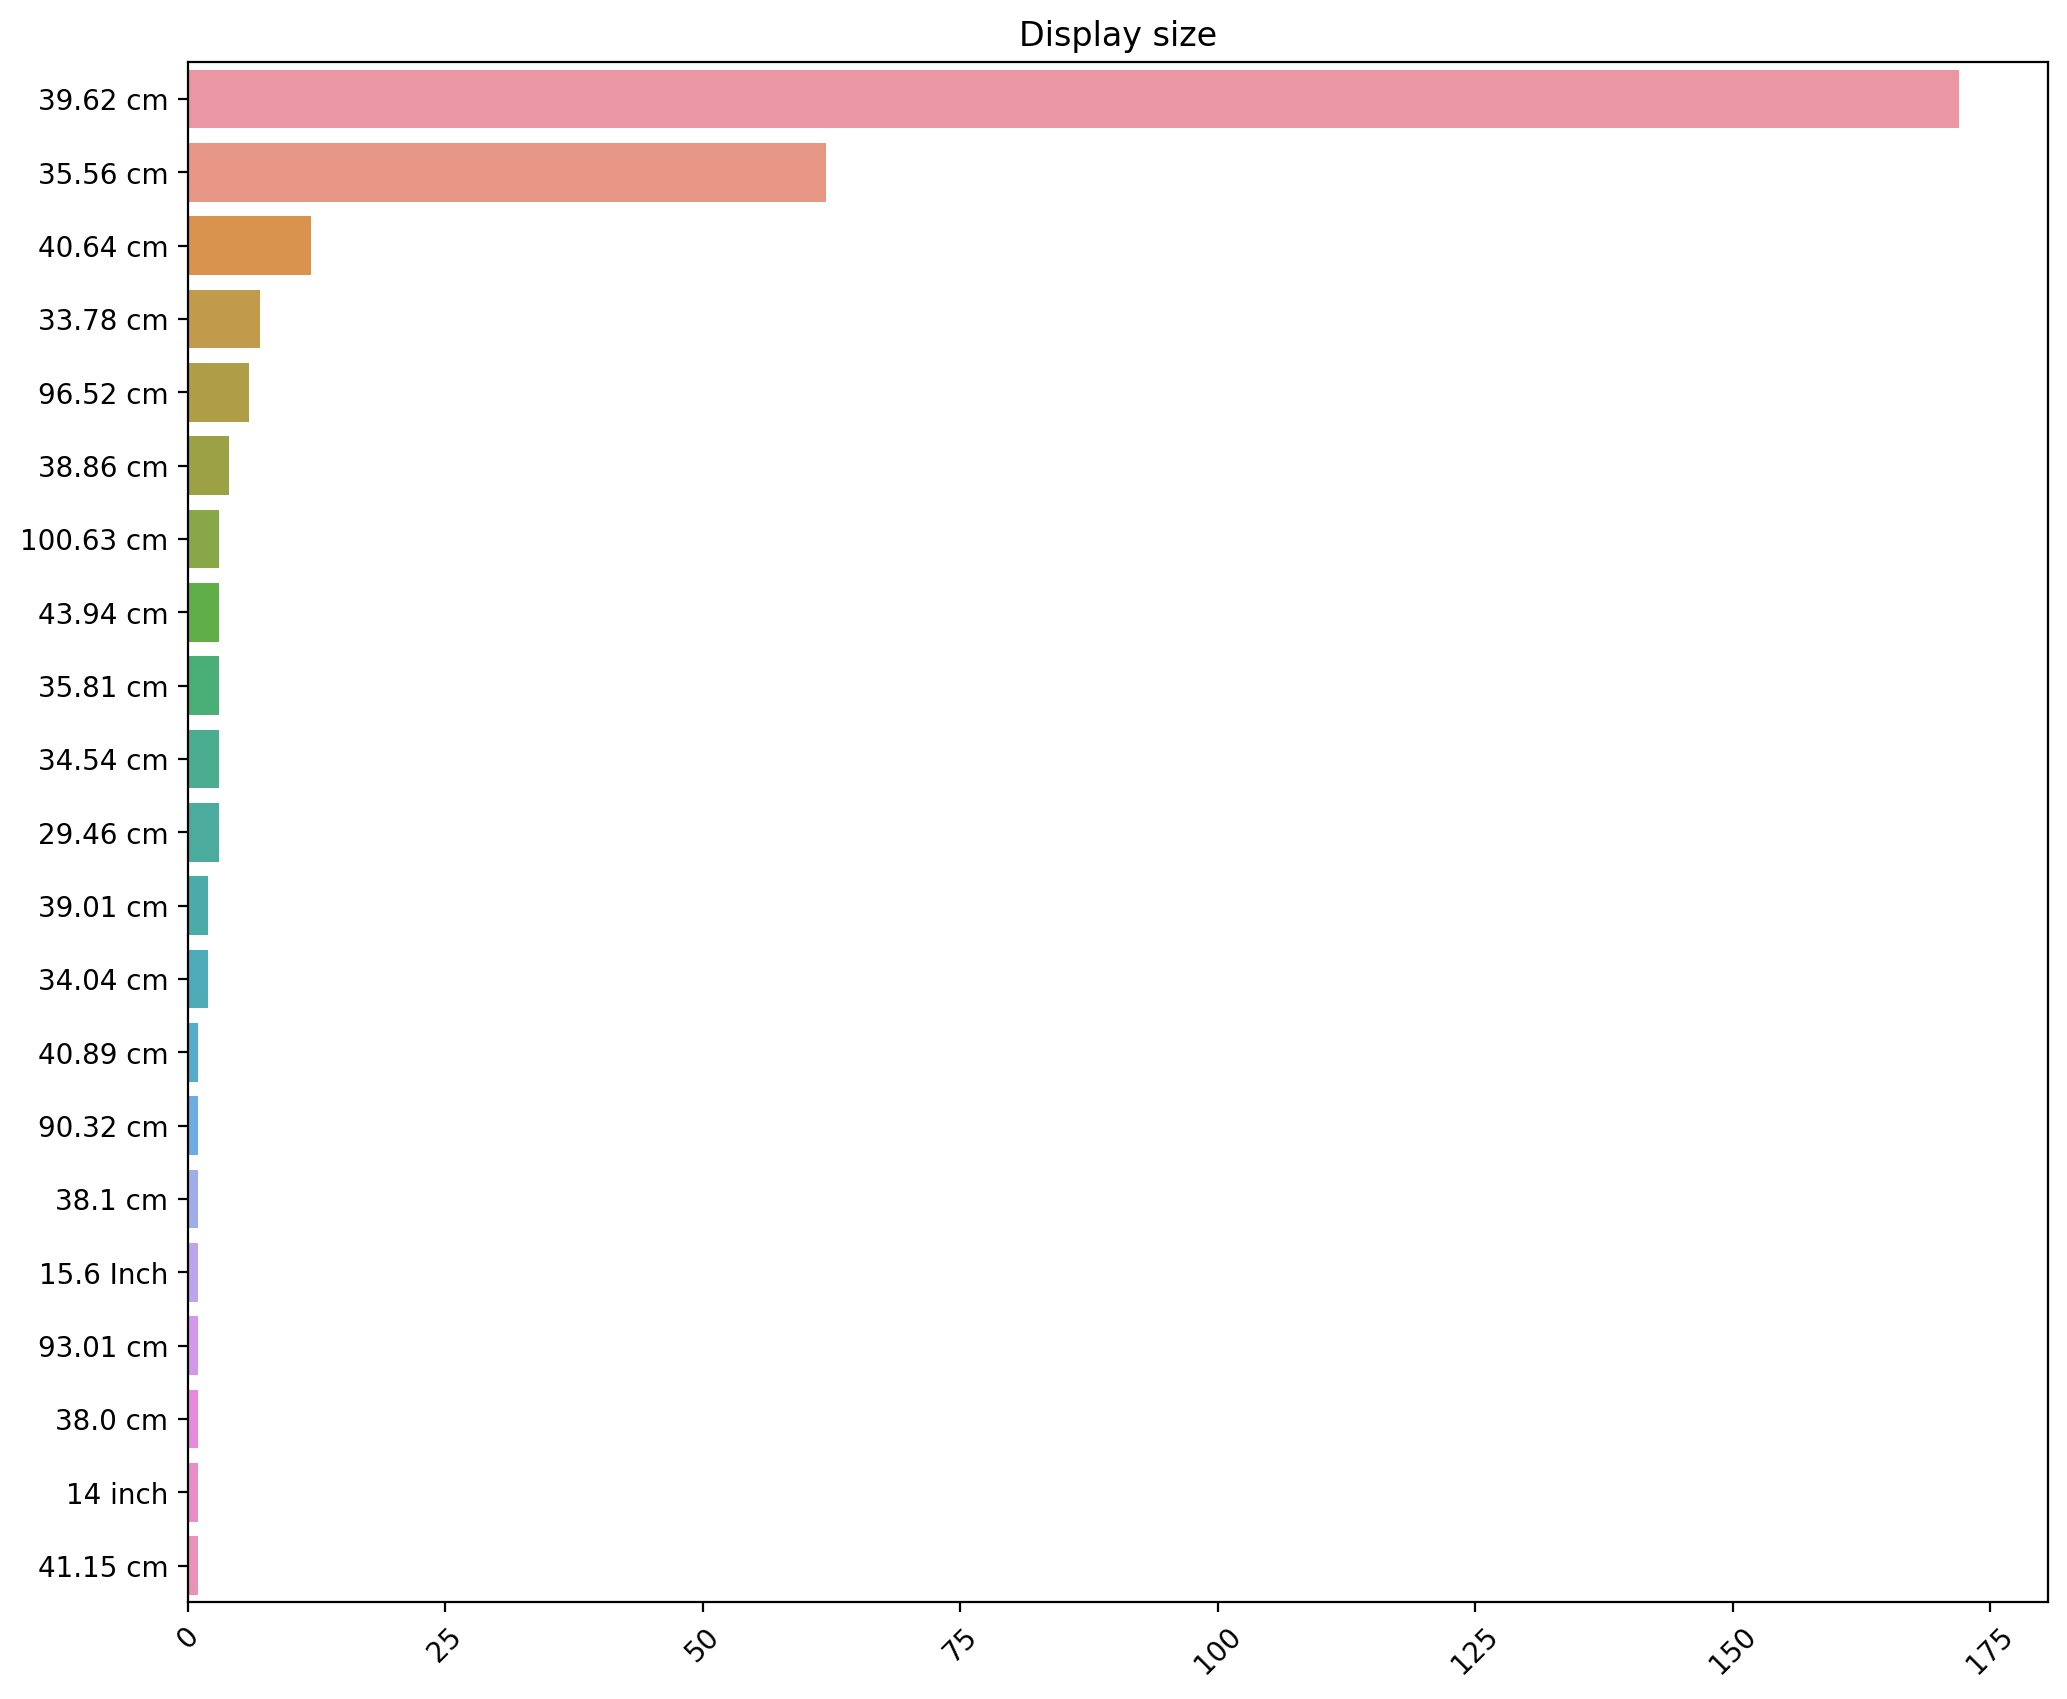

In [510]:
plt.figure(figsize=(12,10),dpi=200),
plt.title("Display size")
sns.barplot(dp.values,dp.index)
plt.xticks(rotation=45)
plt.show()

## ==========================================================================

### Report on display size

- Lenovo gaming laptops has the highest display size of 100.63 cm.
- Around 175 laptops are having a display size of 39.62 cm.

## ==========================================================================

### Analysis on SSD

In [518]:
df.SSD.value_counts()

512 GB           220
256 GB            37
1 TB              23
Not Available      5
512GB              3
128 GB             2
Name: SSD, dtype: int64

<AxesSubplot:xlabel='SSD', ylabel='count'>

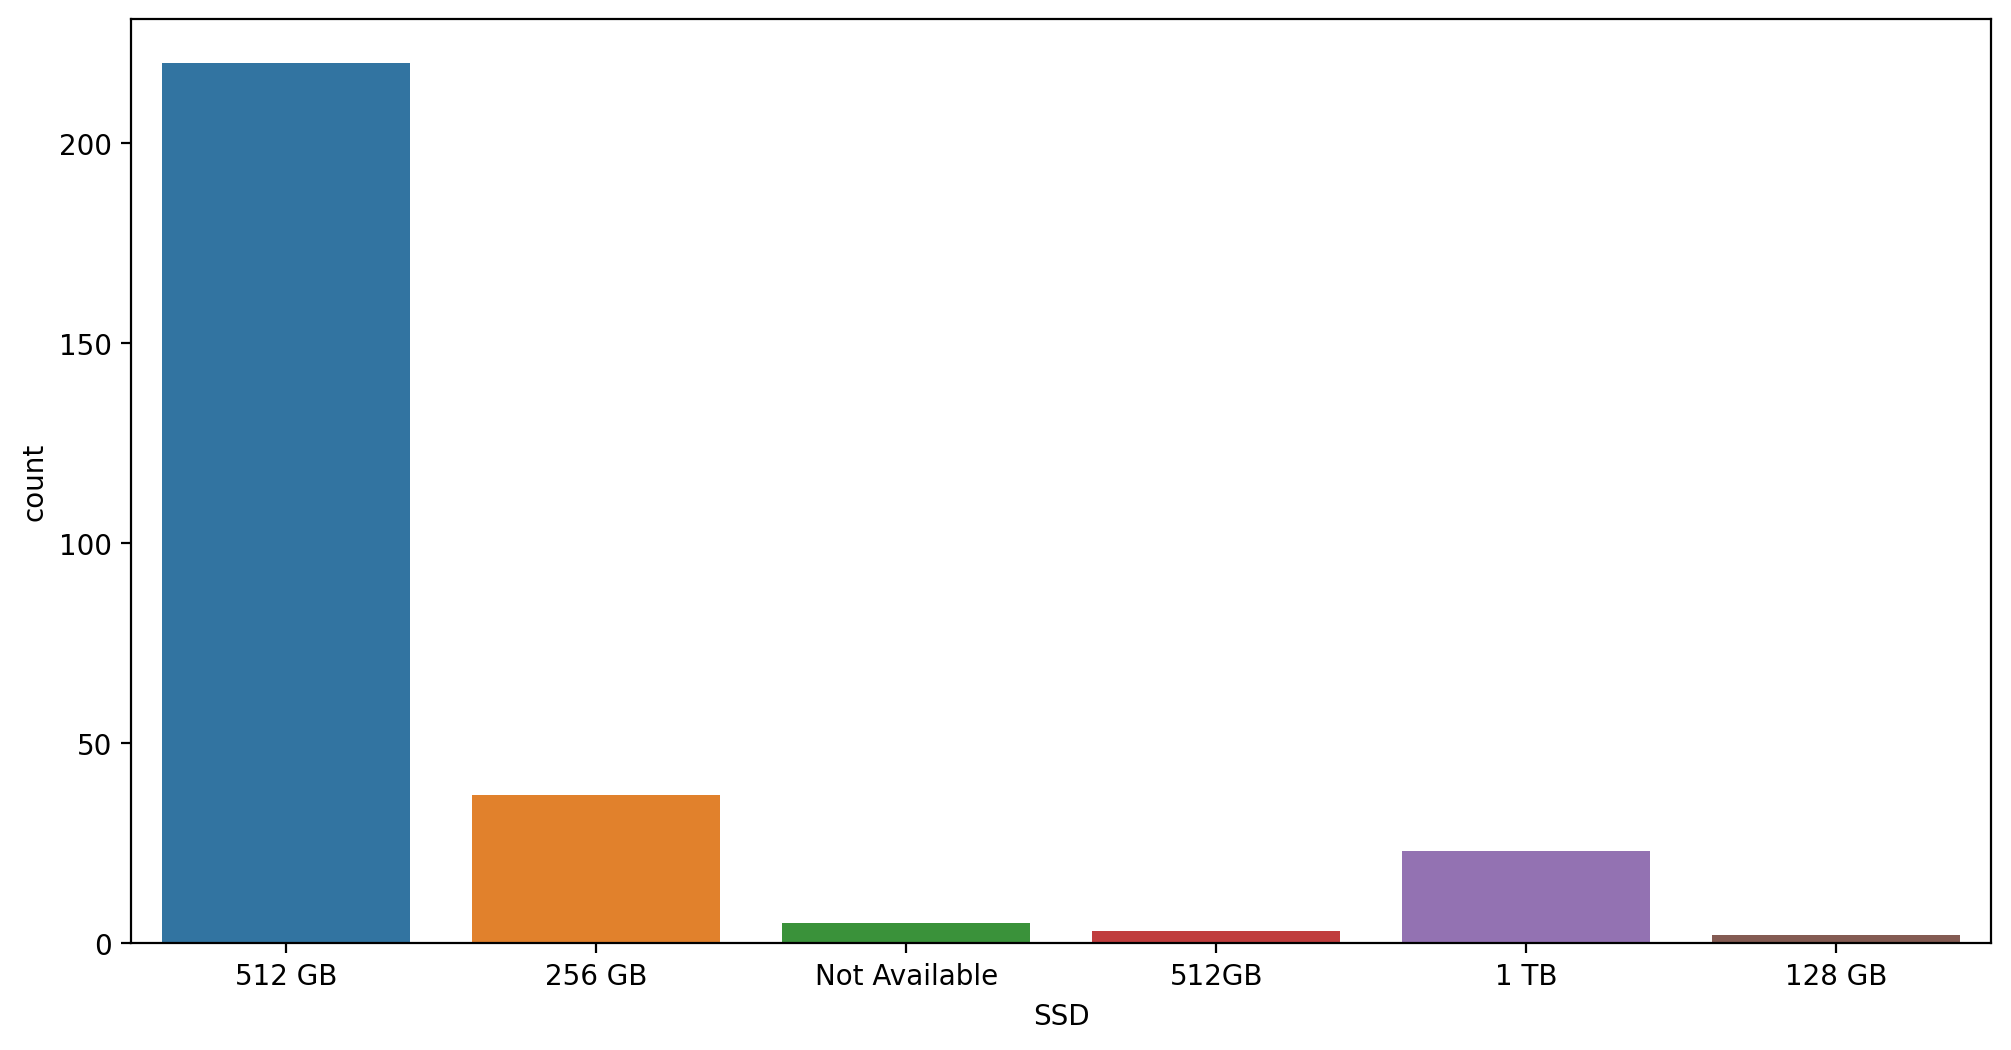

In [519]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(df.SSD)

In [548]:
x=df.sort_values("SSD",ascending=False)[df["SSD"]=="1 TB"].groupby("Brand")["SSD"].count()
x

Brand
APPLE       4
ASUS       10
HP          3
Infinix     1
MSI         5
Name: SSD, dtype: int64

<AxesSubplot:ylabel='Brand'>

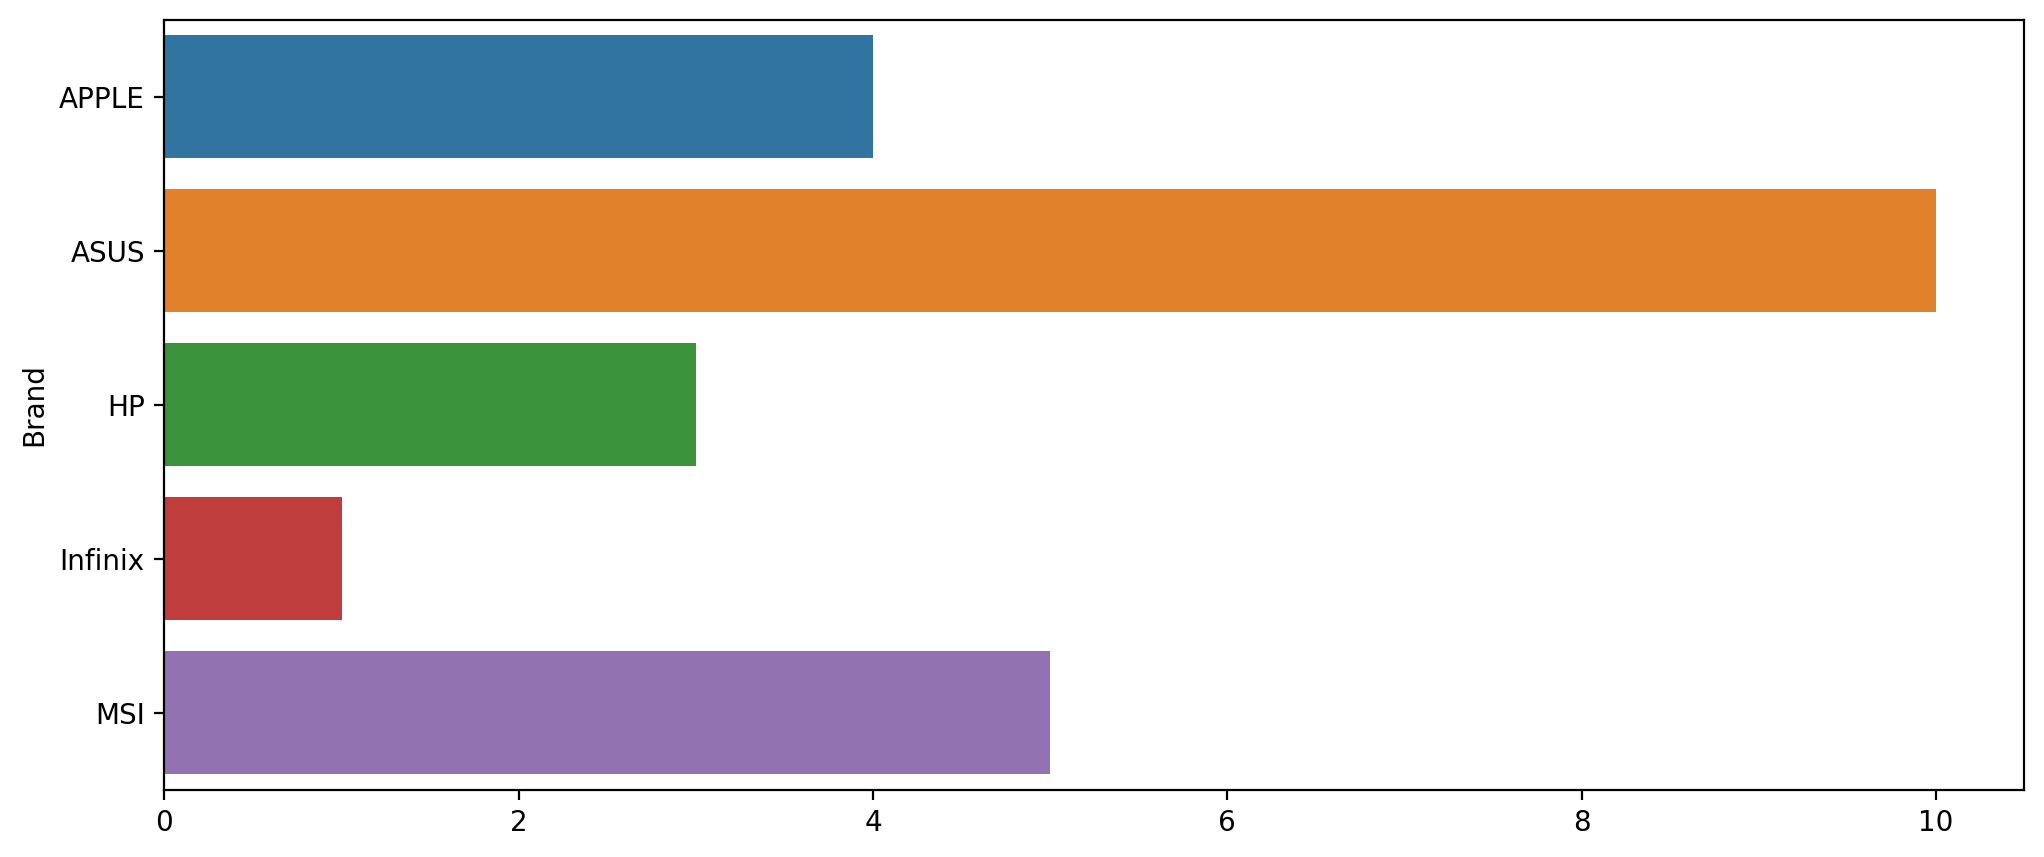

In [551]:
plt.figure(figsize=(12,5),dpi=200)
sns.barplot(x.values,x.index)

## ==========================================================================

### Report on SSD

- Majority of the laptops were having and SSD of 512 GB.
- 23 laptops had the highest SSD of 1 TB.
- ASUS has 10 laptops with highest SSD, MSI has the second highest of 5 laptops with 1 TB, APPLE with 4 laptops, HP has 3 
  and Infinix with 1 .

<AxesSubplot:xlabel='SSD', ylabel='Price'>

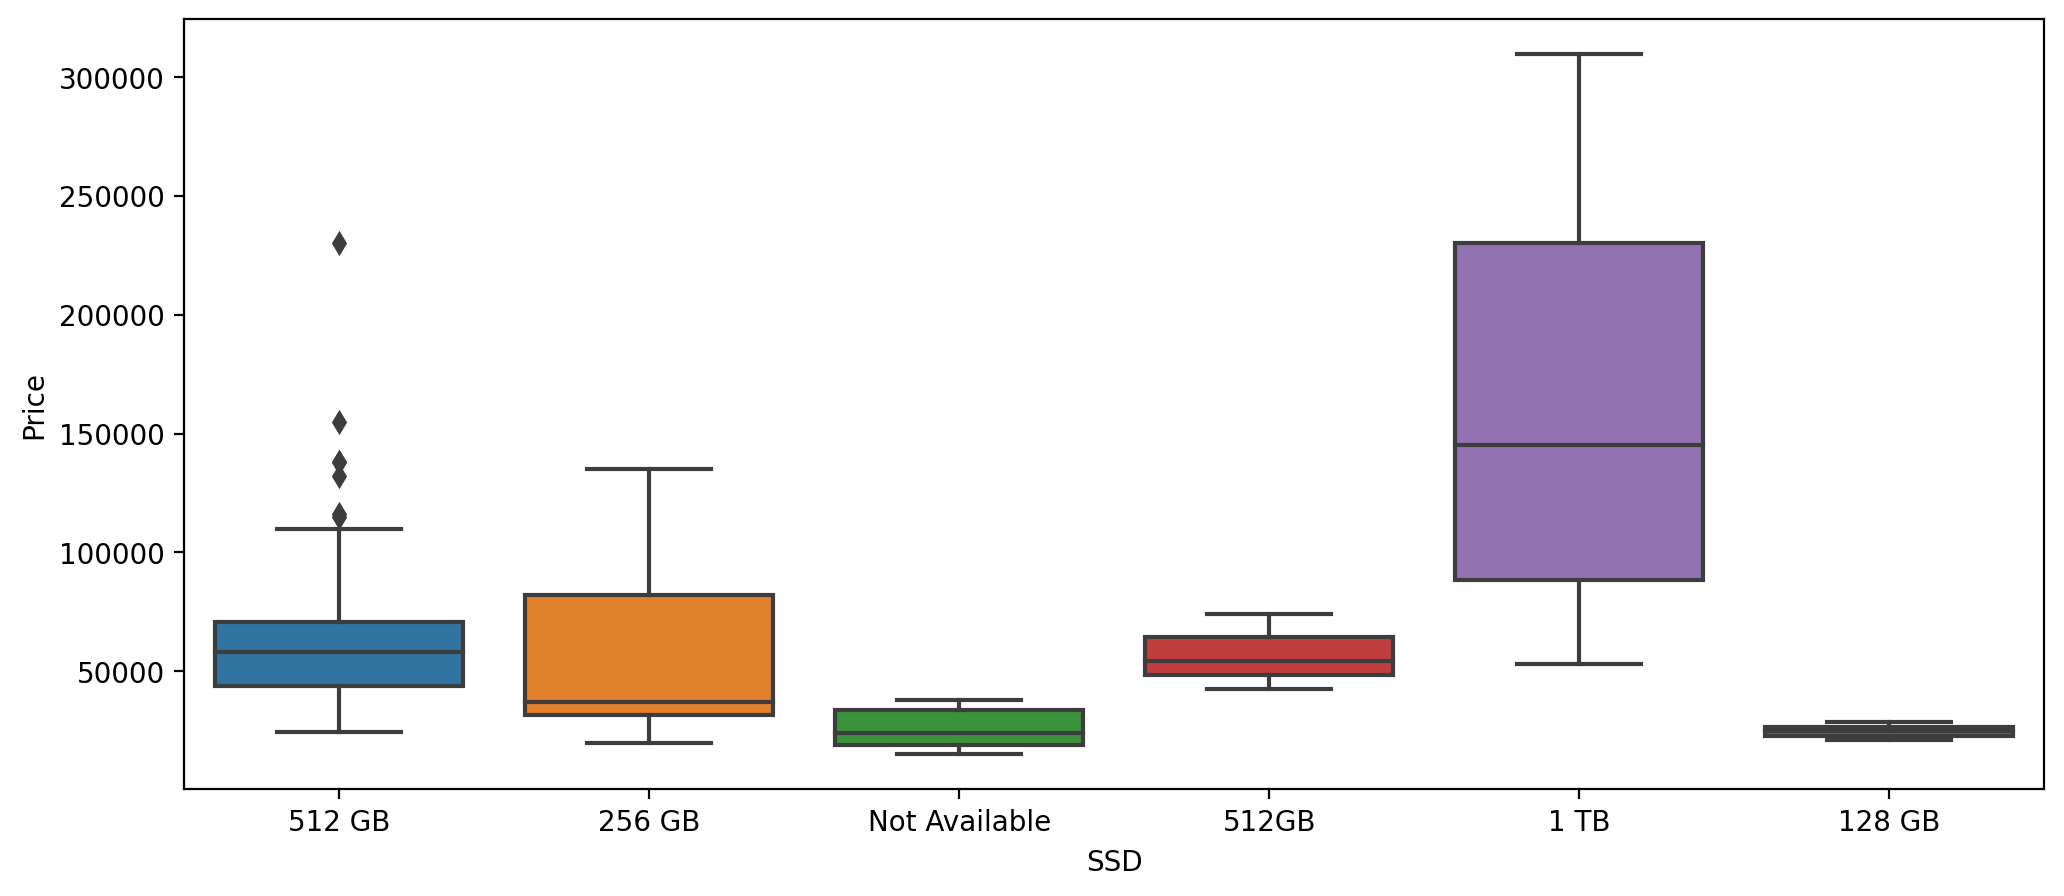

In [561]:
plt.figure(figsize=(12,5),dpi=200)
sns.boxplot(df.SSD,df.Price)

## The Laptops which were having high SSD was the costliest than the other laptops.